
## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All problems **MUST** be solved.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.

The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to answer the questions provided below


## <span style="color:blue">Data Description

The job bulletins will be provided as a folder of plain-text files, one for each job classification.

Job Bulletins: 683 plain-text job postings

Instructions and Additional Documents:

- Job Bulletins with Annotations

- Annotation Descriptions.docx

- City Job Paths

- PDFs

- Description of promotions in job bulletins.docx

- Job_titles.csv

- Kaggle_data_dictionary.csv


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- FILE_NAME: The bulletins file name.
- JOB_CLASS_TITLE: Job title.
- JOB_CLASS_NO: Job number.
- JOB_DUTIES: The duties of this job.
- EDUCATION_YEARS: Number of education yeras needed to apply for this job.
- SCHOOL_TYPE: The type of school you need to study in.
- EDUCATION_MAJOR: The eductaion major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job .
- FULL_TIME_PART_TIME: If the job is full time or part time or both.
- EXP_JOB_CLASS_TITLE: The title of the job you must have experience in before applying in this job.
- COURSE_COUNT: Number of courses neede to apply for this job.
- COURSE_LENGTH: The course length in years or months.
- COURSE_SUBJECT: The course subject tha is needed to be accepted in this job.
- DRIVERS_LICENSE_REQ: Is driver license required or not for this job.
- EXAM_TYPE: Type of exams neededin the hiring process.
- ENTRY_SALARY: Salary range in this job.
- OPEN_DATE: Date at it the job bulliten got open.
- REQUIREMENT_SET_TEXT: The requirments set need for this job in points.

In [ ]:
### Write you code here ###
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

requirements_tag='|'.join(["REQUIREMENT/MIMINUMUM QUALIFICATION",
                  "REQUIREMENT/MINUMUM QUALIFICATION",
                  "REQUIREMENT/MINIMUM QUALIFICATION",
                  "REQUIREMENT/MINIMUM QUALIFICATIONS",
                  "REQUIREMENT/ MINIMUM QUALIFICATION",
                  "REQUIREMENTS/MINUMUM QUALIFICATIONS",
                  "REQUIREMENTS/ MINIMUM QUALIFICATIONS",
                  "REQUIREMENTS/MINIMUM QUALIFICATIONS",
                  "REQUIREMENTS/MINIMUM REQUIREMENTS",
                  "REQUIREMENTS/MINIMUM QUALIFCATIONS",
                   "REQUIREMENT/MINIMUM QUALIFICAITON",
                  "MINIMUM REQUIREMENTS:",
                  "REQUIREMENTS",
                  "REQUIREMENT"])

part_or_full='part-time or full-time|full-time or part-time|part or full|full or part|part-time|full-time|PART-TIME|FULL-TIME|fulltime|parttime|full time|part time'
numbers='one|One|two|Two|three|Three|four|Four|five|Five|six|Six|seven|Seven|eight|Eight|nine|Nine'
school = "college or university|university or college|high school|college|" \
         "apprenticeship|university|school"
license_str="licensed|LICENSED|license|LICENSE"

education_majors='|'.join(["Agribusiness Operations","Airport Guide","computer engineering","Airport","Agricultural Business","Agricultural Economics","carpet layer","Agricultural Mechanization","Agricultural Production","Agronomy & Crop Science","Agriculture","Animal Sciences","Food Sciences ","Horticulture Operations & Management","Horticulture Science","Natural Resources Conservation","Environmental Science","Forestry","Natural Resources Management","Wildlife & Wildlands Management","Architecture","Architectural Environmental Design","Regional Planning","Interior Architecture","Landscape Architecture","African American Studies","Women’s Studies","Liberal Arts","General Studies","Library Science","Interdisciplinary","Art History","Criticism","Studio Arts"," Art ","Cinematography","Video Production","Dancing","Design & Visual Communications","Fashion","Apparel Design","Graphic Design","Industrial Design","Interior Design","Music","Photography","Theatre Arts","Drama","Accounting Technician","Accounting","Business Administration & Management","Hotel Management","Human Resources Management","Human Resources ","International Business Management","Labor","Industrial Relations","Logistics & Materials Management","Marketing Management & Research","Office Supervision & Management","Operations Management & Supervision","Organizational Behavior","Contracts Management","Food Services Management","Small Business Management/Operations","Tourism Management",
                           "Actuarial Science","auto body and fender repairer","auto body builder","body builder","Business","Managerial Economics","Finance","Banking & Financial Support Services","Financial Planning & Services","Insurance & Risk Management","Investments & Securities","Management Information Systems","Real Estate","Sales","Merchandising","Marketing","Fashion Merchandising","Tourism & Travel Marketing","Secretarial Studies & Office Administration","Communications","Advertising","Digital Communications","Media","Journalism","Mass Communications","Public Relations & Organizational Communication","Radio & Television Broadcasting","Communications","Graphic & Printing Equipment Operation","Multimedia","Animation","Special Effects","Radio & Television Broadcasting","Family & Consumer Sciences","Adult Development & Aging/Gerontology","Child Care Services Management","Child Development","Consumer & Family Economics","Food & Nutrition","Textile & Apparel","Parks, Recreation, & Leisure","Exercise Science","Physiology","Kinesiology","Physical Education","Fitness","Administration Management","Personal Services","Cosmetology","Culinary Arts","Chef Training","Funeral Services & Mortuary Science","Protective Services","Corrections","Criminal Justice","Fire Protection & Safety","Law Enforcement","Military Technologies","Public Administration & Services","Community Organization & Advocacy","Public Administration","Public Affairs & Public Policy Analysis","Social Work","COMPUTER SCIENCE",
                    "Geographical Information Systems","Information System","MATHEMATICS","Computer & Information Sciences","Computer Networking","Telecommunications","Computer Programming","Computer Software & Media Applications","Computer System Administration","Data Management","Information Science","Webpage Design","Mathematics","Applied Mathematics","Statistics","Counseling & Student Services","Educational Administration","Special Education","Teacher Education","Curriculum","Early Childhood Education","Elementary Education","Junior High/Middle School Education","Postsecondary Education","Secondary Education","Teacher Assisting","Aide Education","Teacher Education, Subject-Specific","Agricultural Education","Art Education","Business Education","Technical Education","English-as-a-Second-Language Education","English/Language Arts Education","Foreign Languages Education","Health Education","Mathematics Education","Music Education","Physical Education","Science Education","Social Studies","Sciences Education","Aerospace Engineering","Aeronautical Engineering","Agricultural/Bioengineering","Architectural Engineering","Biomedical Engineering","Chemical Engineering","Civil Engineering","Computer Engineering","Construction Engineering/Management","Electrical, Electronics & Communications Engineering","Environmental Health Engineering","Industrial Engineering","Mechanical Engineering","Nuclear Engineering","ENGINEERING TECHNOLOGY & DRAFTING",
                           "Architectural Drafting","Mechanical Drafting","Engineering","engineering","Drafting","Aeronautical/Aerospace Engineering Technologies","Architectural Engineering","Automotive Engineering","Civil Engineering","Computer Engineering","Construction","Engineering","Electrical Engineering","Electronics Engineering","Electromechanical Engineering","Electromechanical ","Biomedical Engineering","Environmental Control","Industrial Production Technologies","Mechanical Engineering","Quality Control & Safety Technologies","Surveying","English Language ","American/English Literature","Creative Writing","Public Speaking","Foreign Languages","Asian Languages ","Ancient Languages ","Literatures","Comparative Literature","French Language & Literature","German Language & Literature","Linguistics","Middle Eastern Languages & Literatures","Spanish Language & Literature","HEALTH ADMINISTRATION & ASSISTING","Health Services Administration","Facilities Administration","Medical Office","Secretarial","Medical Records","Medical Clinical Assisting","Dental Assisting","Medical Assisting","Occupational Therapy Assisting","Physical Therapy Assisting","Veterinarian Assisting","HEALTH SCIENCES & TECHNOLOGIES","Chiropractic","Dental Hygiene","Dentistry","Emergency Medical","Health-Related Professions & Services","Athletic Training","Public Health","Medical Laboratory","Medical Radiologic","Nuclear Medicine","Respiratory Therapy","Building and Safety","Safety and Health",
                           "Surgical","Medicine","Nursing, Practical","Nursing, Registered","Pharmacy ","Physician Assisting","Therapy & Rehabilitation","Alcohol/Drug Abuse Counseling","Massage Therapy","Mental Health Counseling","Occupational Therapy","Physical Therapy ","Psychiatric","Mental Health Technician","Rehabilitation Therapy","Vocational Rehabilitation Counseling","Veterinary Medicine","PHILOSOPHY","Theology","Biblical Studies","Divinity","Ministry","Marketing","refrigeration and air conditioning","refrigeration","air conditioning","Religious Education","Aviation & Airway Science","Aircraft Piloting & Navigation","Aviation Management & Operations","Construction Trades","Mechanics & Repairers","Aircraft Mechanics/Technology","Autobody Repair/Technology","Automotive Mechanics/Technology","Avionics","Diesel Mechanics","Electrical/Electronics Equip Installation & Repair","Precision Production Trades","Machine Tool","Welding","Biology","Biochemistry & Biophysics","Cellular Biology","Ecology","Genetics","Marine/Aquatic Biology","Microbiology & Immunology","Zoology","Physical Sciences","Astronomy","Atmospheric Sciences & Meteorology","Chemistry","Geological & Earth Sciences","Physics","SOCIAL SCIENCES & LAW","Legal Studies","Court Reporting"," Law ","Legal Administrative Assisting/Secretarial","Paralegal/Legal Assistant","Social Sciences","Anthropology","Criminology","Economics","Geography","History","International Relations & Affairs","Political Science & Government","Clinical & Counseling","Psychology","Sociology","Science","Accounting","acounting","engineering","Maintenance"])


jobs1='|'.join(["Occupations","Accountant","Accounts Assistant","Accounts Clerk","Accounts Manager","Senior Management Analyst","Senior Management","Data Analysis","Data Scientist",
       "Accounts Staff","Acoustic Engineer"," Actor ","Actress","Actuary","Acupuncturist","finance management","Electrical Mechanic","Electrical Helper","helper in an electrical","electric services",
        "Electrical Craft Helper","Electrical Craft","electrical work","electric services","repair of auto bodies",
       "Adjustor","Administration Assistant","Administration Clerk","Administration Manager","cement finisher helper",
       "Administration Staff","Administrator","Advertising Agent","Advertising Assistant","Advertising Clerk","Advertising Contractor",
       "Advertising Executive","Advertising Manager","Advertising Staff","Aerial Erector","Aerobic Instructor","Aeronautical Engineer",
       "Agent","Air Traffic Controller","Aircraft Designer","Aircraft Engineer","Aircraft Maintenance Engineer","Maintenance Engineer","Aircraft Surface Finisher",
       "Airman","Airport Controller","Airport Manager","Almoner","Ambulance Controller","Ambulance Crew","Ambulance Driver","Amusement Arcade Worker","Anaesthetist",
       "Analyst","Analytical Chemist","Animal Breeder","Anthropologist","Antique Dealer","Applications Engineer","Applications Programmer","Arbitrator","Arborist","Archaeologist","Architect","Archivist","Area Manager","Armourer","Aromatherapist","Art Critic","Art Dealer","Art Historian","Art Restorer","Artexer","Artist"," Arts ","Assembly Worker","Assessor","Assistant","Assistant Caretaker","Assistant Cook","Assistant Manager","Assistant Nurse","Assistant Teacher","Astrologer","Astronomer","Attendant","Au Pair","Auction Worker","Auctioneer","Audiologist","Audit Clerk","Audit Manager","Auditor","Auto Electrician","Auxiliary Nurse","Bacon Curer","Baggage Handler","Bailiff","Baker","Bakery Assistant","Bakery Manager","Bakery Operator","Balloonist","Bank Clerk","Bank Manager","Bank Messenger","Baptist Minister","Bar Manager","Bar Steward","Barber","Barmaid","Barman","Barrister","Beautician","Beauty Therapist","Betting Shop","Bill Poster","Bingo Caller","Biochemist","Biologist","Blacksmith","Blind Assembler","Blind Fitter","Blinds Installer","Boat Builder","Body Fitter","Bodyguard","Bodyshop","Book Binder","Book Seller","Book-Keeper","Booking Agent","Booking Clerk","Bookmaker","Botanist","Branch Manager","Breeder","Brewer","Brewery Manager","Brewery Worker","Bricklayer","Broadcaster","Builder","Builders Labourer","Building Advisor","Building Control","Building Engineer","Building Estimator","Building Foreman","Building Inspector","Building Manager","Building Surveyor","Bursar","Bus Company","Bus Conductor","Bus Driver","Bus Mechanic","Bus Valeter","Business Consultant","Business Proprietor","Butcher","Butchery Manager","Butler","Buyer","Cab Driver","Cabinet Maker","Cable Contractor","Cable Jointer","Cable TV Installer","Cafe Owner","Cafe Staff","Cafe Worker","Calibration Manager","Camera Repairer","Cameraman","Car Dealer","Car Delivery Driver","Car Park Attendant","Car Salesman","Car Valet","Car Wash Attendant","Care Assistant","Care Manager","Careers Advisor","Careers Officer","Caretaker","Cargo Operator","Carpenter","Carpet Cleaner","Carpet Fitter","Carpet Retailer","Carphone Fitter","Cartographer","Cartoonist","Cashier","Casual Worker","Caterer","Catering Consultant","Catering Manager","Catering Staff","Caulker","Ceiling Contractor","Ceiling Fixer","Cellarman","Chambermaid","Chandler","Chaplain","Charge Hand","Charity Worker","Chartered","Chartered Accountant","Chauffeur","Chef","Chemist","Chicken Chaser","Child Minder","Childminder","Chimney Sweep","China Restorer","Chiropodist","Chiropractor","Choreographer","Church Officer","Church Warden","Cinema Manager","Circus Proprietor","Circus Worker","Civil Engineer","Civil Servant","Claims Adjustor","Claims Assessor","Claims Manager","Clairvoyant","Classroom Aide","Cleaner","Clergyman"," Cleric ","Commissioned","Consultant","Coroner","Councillor","Counsellor","Dealer","Decorator","Delivery Driver","Doctor","Car Driver","Economist","Editor","Engineer","English Teacher","Entertainer","Envoy","Executive","Farmer","Fireman","Floor Layer","Floor Manager","Florist","Flour Miller","Flower Arranger","Flying Instructor","Foam Convertor","Food Processor","Footballer","Foreman","Forensic Scientist","Forest Ranger","Forester","Fork Lift Truck Driver","Forwarding Agent","Foster Parent","Foundry Worker","Fraud Investigator","French Polisher","Fruiterer","Fuel Merchant","Fund Raiser","Funeral Director","Funeral Furnisher","Furnace Man","Furniture Dealer","Furniture Remover","Furniture Restorer","Furrier","Gallery Owner","Gambler","Gamekeeper","Gaming Board Inspector","Gaming Club Manager","Gaming Club Proprietor","Garage Attendant","Garage Foreman","Garage Manager","Garda","Garden Designer","Gardener","Gas Fitter","Gas Mechanic","Gas Technician","Gate Keeper",
                "Genealogist","General Practitioner","Geologist","Geophysicist","Gilder","Glass Worker","Glazier","Goldsmith","Golf Caddy","Golf Club Professional","Golfer","Goods Handler","Governor","Granite Technician","Graphic Designer","Graphologist","Grave Digger","Gravel Merchant","Green Keeper","Greengrocer","Grocer","Groom","Ground Worker","Groundsman","Guest House Owner","Guest House Proprietor","Gun Smith","Gynaecologist","HGV Driver","HGV Mechanic","Hairdresser","Handyman","Hardware Dealer","Haulage Contractor","Hawker","Health Advisor","Health And Safety","Health Care Assistant","Health Consultant","Health Nurse","Health Planner","Health Service","Health Therapist","Health Visitor","Hearing Therapist","Heating Engineer","Herbalist","Highway Inspector","Hire Car Driver","Historian","History Teacher","Hod Carrier","Home Economist","Home Help","Homecare Manager","Homeopath","Homeworker","Hop Merchant","Horse Breeder","Horse Dealer","Horse Riding Instructor","Horse Trader","Horse Trainer","Horticultural Consultant","Horticulturalist","Hosiery Mechanic","Hosiery Worker","Hospital Consultant","Hospital Doctor","Hospital Manager","Hospital Orderly","Hospital Technician","Hospital Warden","Hospital Worker","Hostess","Hot Foil Printer","Hotel Consultant","Hotel Worker","Hotelier","Househusband","Housekeeper","Housewife","Housing Assistant","Housing Officer","Housing Supervisor","Hygienist","Hypnotherapist","Hypnotist","IT Consultant","IT Manager","IT Trainer","Ice Cream Vendor","Illustrator","Immigration Officer","Import Consultant","Importer","Independent Means","Induction Moulder","Industrial Chemist","Industrial Consultant","Injection Moulder","Inspector","Instructor","Instrument Engineer","Instrument Maker","Instrument Supervisor","Instrument Technician","Insurance Agent","Insurance Assessor","Insurance Broker","Insurance Consultant","Insurance Inspector","Insurance Staff","Interior Decorator","Interior Designer","Interpreter","Interviewer","Inventor","Investigator","Investment Advisor","Investment Banker","Investment Manager","Investment Strategist","Ironmonger","Janitor","Jazz Composer","Jeweller","Jewellery","Jockey","Joiner","Joinery Consultant","Journalist","Judge","Keep Fit Instructor","Kennel Hand","Kitchen Worker","Knitter","Labelling Operator","Laboratory Analyst","Labourer","Laminator","Lampshade Maker","Land Agent","Land Surveyor","Landlady","Landlord","Landowner","Landworker","Lathe Operator","Laundry Staff","Laundry Worker","Lavatory Attendant","Law Clerk","Lawn Mower","Lawyer","Leaflet Distributor","Leather Worker","Lecturer","Ledger Clerk","Legal Advisor","Legal Assistant","Legal Executive","Legal Secretary","Letting Agent","Liaison Officer","Librarian","Library Manager","Licensed Premises","Licensee","Licensing","Lifeguard","Lift Attendant","Lift Engineer","Lighterman","Lighthouse Keeper","Lighting Designer","Lighting Technician","Lime Kiln Attendant","Line Manager","Line Worker","Lineman","Linguist","Literary Agent","Literary Editor","Lithographer","Litigation Manager","Loans Manager","Local Government","Lock Keeper","Locksmith","Locum Pharmacist","Log Merchant","Lorry Driver","Loss Adjustor","Loss Assessor","Lumberjack","Machine Fitters","Machine Minder","Machine Operator","Machine Setter","Machine Tool","Machine Tool Fitter","Machinist","Relations Management","financial management","Magician","Magistrate","Magistrates Clerk","Maid","Maintenance Fitter","Make Up Artist","Manicurist","Manufacturing","Map Mounter","Marble Finisher","Marble Mason","Marine Broker","Marine Consultant","Marine Electrician","Marine Engineer","Marine Geologist","Marine Pilot","Marine Surveyor","Market Gardener","Market Research","Market Researcher","Market Trader","Marketing Agent","Marketing Assistant","Marketing Coordinator","Marketing Director","Marketing Manager","Marquee Erector","Massage Therapist","Masseur","Masseuse","Master Mariner","Materials Controller","Materials Manager","Mathematician","Maths Teacher","Matron","Mattress Maker","Management Assistant","Management","Meat Inspector","Meat Wholesaler","Mechanic","Medal Dealer","Medical Advisor","Medical Assistant","Medical Consultant","Medical Officer","Medical Physicist","Medical Practitioner","Medical Researcher","Medical Secretary","Medical Student","Medical Supplier","Medical Technician","Merchandiser","Merchant","Merchant Banker","Merchant Seaman","Messenger","Metal Dealer","Metal Engineer","Metal Polisher","Metal Worker","Metallurgist","Meteorologist",
       "Meter Reader","Microbiologist","Midwife","Military Leader","Milklady","Milkman","Mill Operator","Mill Worker","Miller","Milliner","Millwright","Miner","Mineralologist","Minibus Driver","Minicab Driver","Mining Consultant","Mining Engineer","Money Broker","Moneylender","Mooring Contractor","Mortgage Broker","Mortician","Motor Dealer","Motor Engineer","Motor Fitter","Motor Mechanic","Motor Racing","Motor Trader","Museum Assistant","Museum Attendant","Music Teacher","Musician","Nanny","Navigator","Negotiator","Neurologist","Newsagent","Night Porter","Night Watchman","Nuclear Scientist","Nun","Nurse","Nursery Assistant","Nursery Nurse","Nursery Worker","Nurseryman","Nursing Assistant","Nursing Auxiliary","Nursing Manager","Nursing Sister","Nutritionist","Off Shore","Office Manager","Office Worker","Oil Broker","Oil Rig Crew","Opera Singer","Operative","Optical","Optical Advisor","Optical Assistant","Optician","Optometrist","Orchestral","Organiser","Organist","Ornamental","Ornithologist","Orthopaedic","Orthoptist","Osteopath","Outdoor Pursuits","Outreach Worker","Packaging","Packer","Paediatrician","Paint Consultant","Painter","Palaeobotanist","Palaeontologist","Pallet Maker","Panel Beater","Paramedic","Park Attendant","Park Keeper","Park Ranger","Partition Erector","Parts Man","Parts Manager","Parts Supervisor","Party Planner",
       "Pasteuriser","Pastry Chef","Patent Agent","Patent Attorney","Pathologist","Patrolman","Pattern Cutter","Pattern Maker","Pattern Weaver","Pawnbroker","Payroll Assistant","Payroll Clerk","Payroll Manager","Payroll Supervisor","Personnel Officer","Pest Controller","Pet Minder","Pharmacist","Philatelist","Photographer","Physician","Physicist","Physiologist","Physiotherapist","Piano Teacher","Piano Tuner","Picture Editor","Picture Framer","Picture Reseacher","Pig Man","Pig Manager","Pilot","Pipe Fitter","Pipe Inspector","Pipe Insulator","Pipe Layer","Planning Engineer","Planning Manager","Planning Officer","Planning Technician","Plant Attendant","Plant Driver","Plant Engineer","Plant Fitter","Plant Manager","Plant Operator","Plasterer","Plastics Consultant","Plastics Engineer","Plate Layer","Plater","Playgroup Assistant","Playgroup Leader","Plumber","Podiatrist","Police Officer","Polisher","Pool Attendant","Pools Collector","Porter","Portfolio Manager","Post Sorter","Postman","Postmaster","Postwoman","Potter","Practice Manager","Preacher","Precision Engineer","Premises","Premises Security","Press Officer","Press Operator","Press Setter","Presser","Priest","Print Finisher","Printer","Prison Chaplain","Prison Officer","Private Investigator","Probation Officer","Probation Worker","Procurator Fiscal","Produce Supervisor","Producer","Product Installer","Product Manager","Production Engineer","Production Hand","Production Manager","Production Planner","Professional Boxer","Professional Racing","Professional Wrestler","Progress Chaser","Progress Clerk","Project Co-ordinator","Project Engineer","Project Leader","Project Manager","Project Worker","Projectionist","Promoter","Proof Reader","Property Buyer","Property Dealer","Property Developer","Property Manager","Property Valuer","Proprietor","Psychiatrist","Psychoanalyst","Psychologist","Psychotherapist","Public House Manager","Public Relations Of?cer","Publican","Publicity Manager","Publisher","Publishing Manager","Purchase Clerk","Purchase Ledger Clerk","Purchasing Assistant","Purchasing Manager","Purser","Quality Controller","Quality Engineer","Quality Inspector","Quality Manager","Quality Technician","Quantity Surveyor","Quarry Worker","Racehorse Groom","Racing Organiser","Radio Controller","Radio Director","Radio Engineer","Radio Operator","Radio Presenter","Radio Producer","Radiographer","Radiologist","Rally Driver","Receptionist","Recorder","Records Supervisor","Recovery Vehicle Coordinator","Recreational","Recruitment Consultant","Rector","Reflexologist","Refractory Engineer","Refrigeration Engineer","Refuse Collector","Registrar","Regulator","Relocation Agent","Remedial Therapist",
       "Rent Collector","Rent Offcer","Repair Man","Repairer","Reporter","Representative","Reprographic Assistant","Research Analyst","Research Consultant","Research Director","Research Scientist","Research Technician","Researcher","Resin Caster","Restaurant Manager","Restaurateur","Restorer","Retired","Revenue Clerk","Revenue Officer","Riding Instructor","Rig Worker","Rigger","Riveter","Road Safety Officer","Road Sweeper","Road Worker","Roadworker","Roof Tiler","Roofer","Rose Grower","Royal Marine","Rug Maker","Saddler","Safety Officer","Sail Maker","Sales Administrator","Sales Assistant","Sales Director","Sales Engineer","Sales Executive","Sales Manager","Sales Representative","Sales Support","Salesman","Saleswoman","Sand Blaster","Saw Miller","Scaffolder","School Crossing","School Inspector","Scientific Officer","Scientist","Scrap Dealer","Screen Printer","Screen Writer","Script Writer","Sculptor","Seaman","Seamstress","Secretary","Security Consultant","Security Controller","Security Guard","Security Officer","Servant","Service Engineer","Service Manager","Share Dealer","Sheet Metal Worker","Shelf Filler","Shelter Warden","Shepherd","Sheriff","Sheriff Clerk","Sheriff Principal","Shift Controller","Ship Broker","Ship Builder","Shipping Clerk","Shipping Officer","Shipwright","Shipyard Worker","Shoe Maker","Shoe Repairer","Shooting Instructor","Shop Assistant","Shop Fitter","Shop Keeper","Shop Manager","Shop Proprietor","Shot Blaster","Show Jumper","Showman","Shunter","Sign Maker","Signalman","Signwriter","Site Agent","Site Engineer","Skipper","Slater","Slaughterman","Smallholder","Social Worker","Software Consultant","Software Engineer","Soldier","Solicitor","Song Writer","Sound Artist","Sound Engineer","Sound Technician","Special Constable","Special Needs","Speech Therapist","Sports Administrator","Sports Coach",
                "Sports Commentator","Sportsman","Sportsperson","Sportswoman","Spring Maker","Stable Hand","Staff Nurse","Stage Director","Stage Hand","Stage Manager","Stage Mover","Station Manager","Stationer","Statistician","Steel Erector","Steel Worker","Steeplejack","Stenographer","Steward","Stewardess","Stock Controller","Stock Manager","Stockbroker","Stockman","Stocktaker","Stone Cutter","Stone Sawyer","Stonemason","Store Detective","Storeman","Storewoman","Street Entertainer","Street Trader","Stud Hand","Student","Student Nurse","Student Teacher","Studio Manager","Sub-Postmaster","Sub-Postmistress","Supervisor","Supply Teacher","Surgeon","Surveyor","Systems Analyst","Systems Engineer","Systems Manager","TV Editor","Tachograph Analyst","Tacker","Tailor","Tank Farm Operative","Tanker Driver","Tanner","Tattooist","Tax Advisor","Tax Analyst","Tax Assistant","Tax Consultant","Tax Inspector","Tax Manager","Tax Officer","Taxi Controller","Taxi Driver","Taxidermist","Tea Blender","Tea Taster","Teacher","Teachers Assistant","Technical Advisor","Technical Analyst","Technical Assistant","Technical Author","Technical Clerk","Technical Co-ordinator","Technical Director","Technical Editor","Technical Engineer","Technical Illustrator","Technical Instructor","Technical Liaison","Technical Manager","Technician","Telecommunication","Telecommunications","Telegraphist","Telemarketeer","Telephone Engineer","Telephonist","Telesales Person","Television Director","Television Engineer","Television Presenter","Television Producer","Telex Operator","Temperature Time","Tennis Coach","Textile Consultant","Textile Engineer","Textile Technician","Textile Worker","Thatcher","Theatre Manager","Theatre Technician","Theatrical Agent","Therapist","Thermal Engineer","Thermal Insulator","Ticket Agent","Ticket Inspector","Tiler","Timber Inspector","Timber Worker","Tobacconist","Toll Collector","Tool Maker","Tour Agent","Tour Guide","Town Clerk","Town Planner","Toy Maker","Toy Trader","Track Worker","Tractor Driver","Tractor Mechanic","Trade Mark Agent","Trade Union Official","Trading Standards","Traffic Warden","Train Driver","Trainee Manager","Training Advisor","Training Assistant","Training Co-ordinator","Training Consultant","Training Instructor","Training Manager","Training Officer","Transcriber","Translator","Transport Clerk","Transport Consultant","Transport Controller","Transport Engineer","Transport Manager","Transport Officer","Transport Planner","Travel Agent","Travel Clerk","Travel Consultant","Travel Courier","Travel Guide","Travel Guide Writer","Travel Representative","Travelling Showman","Treasurer","Tree Feller","Tree Surgeon","Trichologist","Trinity House Pilot","Trout Farmer","Tug Skipper","Tunneller","Turf Accountant","Turkey Farmer","Turner","Tutor","Typesetter","Typewriter Engineer","Typist","Tyre Builder","Tyre Fitter","Tyre Inspector","Tyre Technician","Undertaker","Underwriter","Upholsterer","Valuer","Valve Technician","Van Driver","Vehicle Assessor","Vehicle Body Worker","Vehicle Engineer","Vehicle Technician","Ventriloquist","Verger","Veterinary Surgeon","Vicar","Video Artist","Violin Maker","Violinist","Voluntary Worker",
                "Wages Clerk","Waiter","Waitress","Warden","Warehouse Manager","Warehouseman","Warehousewoman","Watchmaker","Weaver","Weighbridge Clerk","Weighbridge Operator","Welder","Welfare Assistant","Welfare Officer","Welfare Rights Officer","Wheel Clamper","Wholesale Newspaper","Window Cleaner","Window Dresser","Windscreen Fitter","Wine Merchant","Wood Carver","Wood Cutter","Wood Worker","Word Processing Operator","Works Manager","Writer","Yacht Master","Yard Manager","Youth Hostel Warden","Youth Worker","Zoo Keeper","Zoo Manager","Zoologist"])

jobs2='|'.join([".net developer ",".net software developer ","accessibility outreach coordinator ","accessibility program manager ","account executive  ","account manager ","accountable manager ","accountable project manager ","accountant ","accounting investment analyst ","actuary ","admin engineer ","administrative aide ","administrative assistant ","administrative associate to the executive director ","administrative business promotion coordinator ","administrative claim examiner ","administrative contract specialist ","administrative coordinator ","administrative engineer ","administrative management auditor ","administrative manager ","administrative office assistant ","administrative procurement analyst ","administrative services manager ","administrative specialist ","administrative staff analyst ","administrative support ","administrative transportation coordinator ","administrator on duty ","advertising and promotions manager ","advertising sales agent ","aerospace engineer ","agency attorney ","agency counsel ","agricultural engineer ","agricultural scientist ","agricultural technician ","aide ","air & noise pollution inspector ","aircraft mechanic ","aircraft pilot ","analyst manager ","analyst ","animal caretaker ","animal control worker ","animal trainer ","animal breeder ","announcer ","apparel patternmaker ","appliance repairer ","application developer ","application examiner ","application solution manager ","application support analyst ","application support reporting specialist ","application worker ","appraiser ","apprentice inspector ","architect ","architectural designer ","archivist ","artist ","assembler ","assessor  ","asset management specialist ","asset manager ","assistant architect ","assistant business services associate ","assistant chief of facility compliance ","assistant civil engineer ","assistant commissioner of administration ","assistant commissioner of communications and policy ","assistant commissioner of enforcement ","assistant commissioner of environmental health unit ","assistant commissioner of housing policy ","assistant commissioner of the office of placement administration ","assistant commissioner ","assistant quality assurance associate ","astronomer ","atmospheric scientist ","audiologist ","audit engineer ","audit intern ","audit manager ","audit supervisor ","auditor ","author ","auto  machinist ","auto mechanic ","automotive glass installer ","avionics technician ","back end developer ","baggage porter ","bailiff ","baker ","barber ","bartender helper ","bartender ","bellhop ","best practices coach ","bid operations liaison ","bill and account collector ","billing and posting clerk ","biological scientist ","biological technician ","biomedical engineer ","blake fellow ","blockmason ","boat captain ","boiler inspector ","boilermaker ","bookbinder ","bookkeeper ","branch chief ","brickmason ","bridge operator ","broadcast and sound engineering technician ","brokerage clerk ","budget analyst ","budget review specialist ","budget ","building cleaner ","building inspector ","bus and truck mechanics and diesel engine specialist ","business administrator  ","business analyst ","business intelligence developer ","business manager ","business operations specialist ","business solution architect ","butcher ","buyer services manager ","buyer ","cabinetmaker ","cafeteria attendant ","calendar assistant ","call center manager ","camera operator ","capacity building assistance specialist ","cargo and freight agent ","carpenter ","cartographer ","case analyst ","case management nurse ","case management team leader ","case management unit supervisor ","case monitor supervisor ","case worker ","cashier supervisor ","cashier ","caster ","ceiling tile installer ","cement mason ","certified it administrator ","certified it developer ","certified specialist ","channel manager ","chauffeur ","chef ","chemical engineer ","chemical technician ","chemists ","chief architect ","chief compliance officer ","chief diversity officer ","chief engineer of dispute resolutions ","chief executive ","chief financial officer ","chief information security officer ","chief investigator ","chief of staff ","chief operating officer ","chief plan examiner ","chief review officer ","child care worker ","child welfare analyst ","chiropractor ","choreographer ","city assessor ","city laborer ","city medical examiner ","city park worker ","city planner ","city planning technician ","city research scientist ","civil design lead ","civil engineer ","civilian investigator ","claim specialist ","claims adjuster ","claims processor ","claims specialist ","clergy ","clerical aide ","clerical assistant ","clerical associate ","clerical supervisor ","client services representative ","climber & pruner ","clinical case supervisor ","clinical director ","clinical laboratory technologist and technician ","cloud reliability engineer ","coach ","collections administrator ","collector ","college aide ","commercial diver ","communication electrician ","communication manager ","communication specialist ","communication worker ","communications equipment operator ","community & industry relations associate ","community assistant ","community associate ","community coordinator ","community service manager ","community supervisor ","compliance analyst ","compliance and enforcement attorney ","compliance auditor ","compliance manager ","compliance officer ","compliance support specialist ","computer aide ","computer and information systems manager ","computer associate ","computer control operator ","computer hardware engineer ","computer operator ","computer programmer ","computer scientist ","computer service technician ","computer software engineer ","computer specialist ","computer support specialist ","computer systems manager ","concierge ","confidential investigator ","conflict resolution specialist ","consent specialist ","conservation scientist  ","constituent services liaison ","construction inspector ","construction intern ","construction manager ","construction project manager ","construction safety and quality inspector ","content developer ","content engineer  ","contract analyst ","contract manager ","contract processor ","contract specialist ","contracts attorney ","contracts officer ","conveyor operator ","coordinator ","correctional officer ","correctional officers ","cosmetologist ","cost estimating manager ","cost estimator ","counselor ","courier ","court liaison officer ","court representative ","cranes & derricks inspector ","credit analyst ","credit authorizer ","crime analyst ","criminal investigator ","criminalist ","crm developer ","crossing guard ","cultural affairs coordinator ","curator ","custodial assistant ","custodian ","customer service & operations analysis intern ","customer service representative ","customer service ","cybersecurity operations analyst ","dam safety coordinator ","dancer ","data analyst ","data and process analyst ","data and technology analyst ","data architect ","data assistant ","data engineer ","data entry clerk ","data entry keyer ","data management assistant ","data manager","data research analyst ","data research specialist ","data scientist ","data support analyst ","data warehouse architect ","database administrator","database administrator ","database developer ","dba engineer ","dba lead ","deckhand ","demonstrator ","dental assistant ","dental hygienist ","dentist ","deputy budget director ","deputy chief engineer ","deputy chief of outside development ","deputy chief of quality assurance ","deputy chief ","deputy commissioner ","deputy director ","deputy executive director ","derrick service unit operator ","design manager ","designer ","desk clerk ","desktop publisher ","detectives ","dietitian ","director ","dishwasher ",
                "dispatcher ","distributor ","division chief ","door-to-door sales worker ","drafter ","dressmaker ","drywall installer ","dynamic crm developer ","early childhood education consultant ","early intervention official ","earth driller ","economic analyst ","economist ","edge engineer ","e-discovery analyst ","editor ","editorial intern ","education administrator ","e-learning content developer ","electrical engineer ","electrical inspector ","electrical power-line installer ","electrician ","electronics engineer ","elementary teacher ","elevator installer ","elevator repairer ","eligibility interviewer ","eligibility worker ","emergency communications specialist ","emergency field logistics coordinator ","emergency manager ","emergency medical technician ","employee benefits coordinator ","employee relations specialist ","energy analyst ","energy policy advisor ","energy program analyst ","engineer in charge ","engineering manager ","engineering technician ","engraver ","entertainer ","enviromental assessment coordinator ","environmental compliance specialist ","environmental engineer ","environmental health & safety auditor ","environmental health & safety incident investigator ","environmental health & safety regional manager ","environmental program manager ","environmental project manager ","environmental review unit ","environmental scientist ","environmental specialist ","equipment training coordinator ","equity & special projects coordinator ","escalation line team leader ","etchers ","etl developer ","etl lead ","evaluation coordinator ","evaluation lead ","evaluation specialist ","examiner ","examining attorney ","executive agency counsel ","executive assistant ","executive director ","executive program coordinator ","executive project auditor ","executive project manager ","explosives worker ","extraction worker ","facilities clerk ","facilities management assistant ","facility operations custodial assistant ","family advocate ","farm ranch and other agricultural manager ","farmer  ","fence erector ","field  doctor ","field captain ","field inspector ","field operations training coordinator ","field outreach specialist ","field services technician ","field tech ","field/desktop technician ","file clerk ","financial analyst ","financial examiner ","financial manager ","financial reviewer ","financial specialist ","fingerprint unit specialist ","fire fighter ","fire inspector ","fire medical officer ","fiscal coordinator ","fiscal manager ","fish and game warden ","fisher ","fleet administrator ","fleet assistant ","fleet management assistant ","flight engineer ","food preparation worker ","food science technician ","food scientist ","food server ","food service manager ","forensic logistics specialist ","forensic pathology technician ","forester ","foster care program evaluator ","front end developer ","functional analyst ","funeral director ","funeral service worker ","furniture coordinator ","furniture finisher ","gaming manager ","gaming surveillance officer ","gardener ","general counsel ","general manager  ","general services associate ","geological engineer ","geological technician  ","geologist ","geoscientist ","gis analyst ","gis editor ","gis specialist ","glazier ","grader ","grant coordinator ","grant manager ","grant project manager ","graphic artist ","green infrastructure engineer ","greeter ","grounds maintenance worker ","groundskeeping worker ","group head ","hairdresser ","hairstylist ","hazardous materials removal worker ","head cook ","health adviser ","health diagnosing and treating practitioner ","health navigator ","health promoter ","hearing officer ","heat coordinator ","heating plant technician ","heavy vehicle and mobile equipment service technician ","help desk representative ","help desk technician ","high pressure plant tender ","highway maintenance worker ","highways and sewers inspector ","hiring plan analyst ","home health aide ","homeowner mortgage service manager ","host ","hostess ","hostler ","housekeeping cleaner ","hr payroll systems security architect ","hr specialist ","hro application support manager ","human resources administrative assistant ","human resources analyst ","human resources assistant ","human resources associate ","human resources college aide ","human resources coordinator ","human resources generalist ","human resources manager ","human resources specialist ","human resources support staff ","human resources ","human rights specialist ","hunter ","HVAC mechanic ","implementation coordinator ","incident commander ","industrial control technician ","industrial engineer ","industrial hygienist ","industrial production manager ","industrial program compliance analyst ","information clerk ","information representative ","information security architecture & engineering manager ","information security audit and compliance manager ","information security identity & access manager ","information security officer ","information systems and quality analyst ","inspector general ","inspector ","inspector  ","instructor ","instrumentation specialist ","insulation worker ","insurance claims and policy processing clerk ","insurance sales agent ","insurance underwriter ","intake investigator ","integration support engineer ","integrity control officer ","interagency exercise coordinator ","intergovernmental affairs intern ","intergovernmental outreach coordinator ","intergovernmental relations task force ","intern ","interpreter ","interviewer ","investigative auditor ","investigative consultant ","investigative manager ","investigator trainee ","investigator ","investment analyst ","investment officer ","ios developer ","ip telephony design engineer ","iron worker ","it - project manager ","it auditor ","it budget & contracts manager ","it business analyst ","it contract analyst ","it contracts specialist ","it helpdesk manager ","it infrastructure project manager "
                   ,"it operations clerk ","it relationship manager ","it security analyst ","it security officer ","it support technician ","jailer ","janitor ","janitorial worker ","java developer ","jeweler ","judge ","junior accountant ","junior financial planning and reporting analyst ","junior public health nurse ","junior z/os engineer ","juvenile implementation manager ","juvenile justice trainer ","kettle operator ","kiln operator ","kindergarten teacher ","labor law investigator ","labor relations attorney ","labor relations specialist ","labor standards investigator ","laboratory associate ","laboratory microbiologist ","laboratory technician ","landscape architect ","lead business analyst ","lead design engineer ","lead designer ","lead expense management analyst ","lead trainer ","learning management ","lease analyst ","leather workers ","legal assistant ","legal coordinator ","legal support worker ","legislator ","letterer and sign painter ","liaison ","librarian ","library assistant ","library technician ","licensed vocational nurse ","licensing clerk ","lifeguard ","linux administrator ","load officer ","loan counselor ","loan officer ","lobby attendant ","locksmith ","locomotive engineer ","lodging manager ","logging worker ","logistician ","low pressure boiler inspector ","machine operator ","machinist ","magistrate ","maid ","mail clerk ","mail machine operator ","mail superintendent ","mailroom control clerk ","mailroom section supervisor ","maintenance facilitator ","maintenance worker ","management analyst ","management auditor ","management systems specialist crm information systems manager ","manager ","mapping technician ","marine electronics technician ","marine engineer ","marine oiler mate ","market researcher ","marketing and sales manager ","massage therapist ","material moving worker ","materials engineer ","materials scientist ","mathematician ","measurer ","mechanical cost estimator ","mechanical engineer ","media worker ","mediation coordinator ","medical and health services manager ","medical assistant ","medical examiner assistant ","medical records and health information technician ","medical scientist ","medical technician ","medicolegal analyst ","medicolegal investigator ","meeting and convention planner ","mental health coordinator ","messenger ","metal work mechanic ","meter reader ","metrics and reporting engineer ","middle school teacher ","millwright ","mining engineer ","mining machine operator ","mobile device management architect ","molder ","motor vehicle operator ","museum technician ","musician ","natural sciences manager ","naval architect ","neigborhood resiliency specialist ","network administrator ","network engineer ","network field technician ","network services manager ","news analyst ","news and street vendor ","nuclear engineer ","nuclear technicians ","nurse home visitor ","nursing supervisor ","nutrition consultant ","nutritionist ","occupational therapist assistant ","occupational therapist ","office administrator ","office assistant ","office clerk ","office coordinator ","office machine aide ","office machine repairer ","office manager ","oil burner specialist ","ombudsperson ","on-line medical control physician ","open data lead analyst ","open market order coordinator ","operations associate ","operations coordinator ","operations customer service liaison ","operations desktop support technician ","operations manager ","optical network engineer ","optician ","optometrist ","order clerk ","order filler ","ordered deductions analyst ","ordnance handling expert ","outbreak data analyst ","outreach assistant ","outreach intern ","packager ","packer ","painter ","paperhanger ","paralegal aide ","paralegal assistant supervisor ","paralegal ","paramedic ","parking enforcement officer ","parking enforcement worker ","parking lot attendant ","parks enforcement patrol ","parts salesperson ","patternmaker ","payment analyst ","payroll data associate ","payroll liaison ","payroll supervisor ","payroll systems analyst ","penalty processing unit cashier ","peoplesoft developer ","performance management specialist ","performer ","permit records assistant ","personal and home care aide ","personal care and service worker ","personal financial advisor ","personnel associate ","personnel coordinator ","pest control aide ","pest control worker ","petroleum engineer ","petroleum technician ","pharmacist ","photogrammetrist ","photographer ","physical scientist ","physical therapist assistant ","physical therapist ","physician assistant ","physician ","physicist ","pile-driver operator","pipefitter ","pipelayer ","placement staff nurse ","plan examiner ","plan management specialist ","plasterer ","plumber ","plumber's helper ","plumbing and fire suppression engineer ","plumbing inspector ","podiatrist ","police administrative aide ","police officer ","police surgeon ","policeman ","policy advisor ","policy analyst ","policy writer ","port marine engineer ","portal support engineer ","portfolio manager ","postal office clerk ","postal service clerk ","postal service mail carrier ","postal service mail sorter ","postmaster ","postsecondary teacher ","power plant operator ","preplacement nurse practitioner ","prepress technician ","preschool teacher ","press officer ","presser ","principal administrative associate ","principle design manager ","private detective ","probation assistant ","probation officer trainee ","probation officer ","procedural justice coordinator ","process messenger ","process reform analyst intern ",
                "process server ","processor ","procurement analyst ","procurement clerk ","procurement contracting officer ","procurement specialist ","producer  ","product advisor ","product manager ","product owner ","product promoter ","product support specialist ","production support ","program administrator ","program analyst ","program and policy specialist ","program assistant ","program associate ","program contract analyst ","program coordinator for early childhood health ","program executive ","program management office assistant ","program manager ","program manager cadd coordinator ","program planner ","program specialist ","project coordinator ","project cost estimator ","project development coordinator ","project director ","project manager ","project manager  ","project planner ","project specialist ","projects coordinator ","property acquisition coordinator ","property manager ","prosecutor ","psychologist ","public health adviser ","public health assistant ","public health detailing specialist ","public health epidemiologist ","public health nurse ","public policy and training coordinator ","public records aide ","public relations manager ","public relations specialist ","public warning specialist ","pumping station operator ","purchasing agent - buyer ","purchasing agent ","purchasing manager ","qa analyst ","qa senior auditor ","quality assurance auditor ","quality assurance engineer ","quality assurance manager ","quality assurance project manager ","quality assurance specialist ","quality child care manager ","quality control case reviewer ","quality control senior engineer ","quality improvement specialist ","quality management specialist ","radiation emergency response specialist ","radiation therapist ","radio and telecommunications equipment installer ","radio operators","radio repair mechanic ","radio room operator ","railroad conductor ","rail-track laying and maintenance equipment operator ","rancher ","real estate agent ","real estate broker ","real estate developer ","real estate manager ","rebar workers ","receivables/payables analyst ","receptionist ","records officer ","records searcher ","recreation and fitness worker ","recreational therapist ","recruiting & onboarding coordinator ","recruitment assistant ","refuse and recyclable material collector ","regional field administrative assistant ","registered dental hygienist ","registered nurse ","regulatory and licensing specialist ","regulatory compliance agency attorney ","reinforcing iron worker ","religious worker ","remote learning team specialist ","rental clerk ","reporter ","research analyst ",
                "research assistant ","research scientist ","resident engineer ","residential advisor ","resiliency coordinator ","resiliency engineer ","resource specialist ","respiratory therapist ","retail buyer ","retail salesperson ","retail specialist ","revenue agent ","revenue assistant ","review unit supervisor ","rezoning manager ","rigger ","risk management ","roof bolter ","roofer ","roustabout ","safe event coordinator ","safety & equipment training specialist ","safety accident investigator ","safety auditor ","safety engineer ","sailor ","sales agent ","sales engineer ","sales representative ","samplers ","sanitation engineer ","scanning operator ","school health nurse practitioner ","school mental health consultant ","school mental health training coordinator ","scientist scientist ","searcher" ,"seasonal city park worker ","secondary school teacher ","secretary to division chief ","section chief ","securities commodities and financial services sales agent ","security administrator ","security and fire alarm systems installer ","security guard ","security officer ","security specialist ","security system administrator ","security systems engineer ","senior accountant ","senior advisor ","senior analyst ","senior application engineer ","senior architect cloud infrastructure design and engineering ","senior bi developer ","senior budget analyst ","senior business analyst ","senior case support associate ","senior civil service advisor ","senior construction manager ","senior cook ","senior counsel ","senior crm developer ","senior data analyst ","senior data scientist ","senior design engineer ","senior developer ","senior director it ","senior director ","senior early childhood education consultant ","senior electrical engineer ","senior engineer ","senior estimator ","senior exchange engineer ","senior field supervisor ","senior financial reporting investment analyst ","senior forester for restitution ","senior general counsel ","senior human capital partnership and performance management analyst ","senior human resources specialist ","senior inspector ","senior intergroup relations officer ","senior investigative auditor ","senior investment analyst ","senior it business analyst ","senior it project manager ","senior landscape architect ","senior mainframe programmer analyst ","senior mobile developer ","senior network engineer ","senior network specialist ","senior operations associate ","senior organizational development and training specialist ","senior payment analyst ","senior peoplesoft analyst ","senior police administrative aide ","senior policy advisor ","senior port engineer ","senior product manager ","senior program manager ","senior program officer ","senior programmer ","senior project analyst ","senior project controls specialist ","senior project engineer ","senior project leader ","senior project manager ","senior project officer ","senior public health inspector ","senior quality oversight analyst ","senior rackets investigator ","senior radio system network engineer ","senior research analyst ","senior resiliency planner ","senior safety accident investigator ","senior security analyst ","senior service desk agent ","senior staff electrical engineer ","senior stationary engineer ","senior technology analyst/coordinator ","senior title examiner ","senior trainer ","senior urban designer ","senior windows administrator ","septic tank servicer ","sergeant ","server support engineer ","service asset configuration manager ","service contract procurement analyst ","service desk agent ","service desk manager ","service station attendant ","sewer pipe cleaner ","sewer ","sewing machine operator ","sharepoint developer ","sheet metal worker ","sheriff's patrol officer ","ship engineer ","ship loaders","shuttle car operator ","singer ","small engine mechanic ","social science research assistant ","social scientist ","social service specialist ","social worker ","sociologist ","software developer ","solar energy project manager ","solutions director ","sorter ","space analyst ","space scientists ","special assistant to assistant deputy commissioner ","special assistant ","special consultant ","special education teacher ","special examiner ","special projects manager ","special underwriting project manager ","speech-language pathologist ","spending analyst ","sql/oracle database administrator ","sr. analyst ","sr. internal auditor ","staff analyst ","staff analyst ii ","staff analyst level ii ","staff analyst ","staff attorney ","staff auditor ","staff counsel ","staff engineer"," architect ","staff photographer ","mechanical","electrical"
,"standards specialist ","stationary engineer ","statistical analyst ","statistical assistant ","statistician ","steamfitter ","steel workers ","stock clerk ","stock worker level ii ","stonemason ","storage engineer ","stormwater program coordinator ","strategic account manager ","strategic initiatives coordinator ","strategic operations policy analyst ","strategic partnership liaison ","strategic planning associate ","street ambassador ","structural engineer ","structural iron and steel worker ","stucco mason ","student data analyst ","student legal specialist ","summer college intern ","summer communications assistant ","summer graduate intern ","summer it intern ","supervising health nurse ","supervising housing groundskeeper ","supervising nurse ","supervising physician ","supervising public health advisor ","supervisor ","support engineer ","support worker ","surgeon ","survey researcher ","surveyor ","switchboard operator ","system administrator ","systems access management engineer ","systems administrator - computer software ","systems analyst ","tailor ","talent acquisition specialist ","taper ","tax examiner ","tax incentives director ","tax preparer ","taxi driver ","teacher assistant ","team coach team leader ","technical investigator ","technical lead ","technical project manager/product owner ","technical sales manager ","technical solutions professional ","technical writer ","technician ","telecommunications associate ","telemarketer ","telephone operator ","teller ","temporary assistant urban designer ","temporary painter ","tender ","testifier/searcher ","testing lead ","therapist ","thermostat repairer ","third party services analyst ","threat analyst timekeeper ","ticket taker ","tile installer ","timekeeper ","timekeeping specialist ","tool grinder ","tort attorney ","tour guide ","tracking and monitoring data analyst ","trainer & curriculum development specialist ","trainer ","training specialists ","transit and railroad policeman ","translator ","transportation specialist ","transportation storage and distribution manager ","trapper ","trauma-informed early care and education case supervisor ","travel agent ","travel guide ","triage coordinator ","triage nurse ","triage supervisor ","trial preparation assistant ","truck driver ","typist ","umpire ","unit clerk ","unit manager ","unix system administrator ","unix/linux systems lead ","upholsterer ","urban and regional planner ","urban technology architect ","urban technology security researcher ","usher ","valve installer ","vessel construction manager ","veterinarian ","virtual systems engineer ","vision screening assistant ","vp for project management ","wage subsidy processing clerk ","waiter ","waitress ","water resources analyst ","water use inspector ","waterfront facilities engineer ","waterfront project manager ","watershed maintainer ","web application developer ","webform team member ","weigher ","welder ","wellness advocate supervisor ","wellness advocate ","windows administrator ","wireless coordinator ","woodworker ","word processor  ","workforce management analyst ","workforce planning intern ","writer ","x-ray technician ","yardmaster ","youth initiatives lead advisor"," helper ","Operations"])

# Function to extract job titles from a file

def extract_job_titles(my_text):
    title_match = re.search("([\s\S]*?)(Class|EXEMPT EMPLOYMENT OPPORTUNITY)", my_text)
    try:
        job_title = title_match.group(1).strip().upper()
    except:
        job_title = None
    return job_title
def job_code_ex(my_text):
    # Define a regular expression pattern for job codes
    job_code_pattern = re.compile(r"(Class Code:|Code:)\s*(\d+)", re.IGNORECASE)

    # Search for the pattern in the file text
    match = job_code_pattern.search(my_text)

    if match:
        # Extract the job code from the matched group
        job_code = match.group(2).strip()
        return job_code
    else:
        # Return None if no match is found
        return None

def extract_duties(my_text):
    # Define a regular expression pattern for duties
    duties_pattern = re.compile(r"DUTIES\s+\n+([\s\S]*?)\s+\n+", re.IGNORECASE)

    # Search for the pattern in the file text
    duties_section = duties_pattern.search(my_text)

    if duties_section:
        # Extract the duties from the matched group
        duties = duties_section.group(1).strip()
        return duties
    else:
        # Return None if no match is found
        return None
# def extract_duties(my_text):
#     duties_match = re.search("(DUTIES|DUTY)\s+(.*)", my_text,re.DOTALL|re.IGNORECASE)
#     try:
#         duties = duties_match.group(2).strip()
#         duties= ' '.join(duties.splitlines())
#     except:
#         duties = None
#     return duties


def get_education(lines):
    educations = re.compile(r'(phd|master|college or university|high school|school|college|university|APPRENTICESHIP)', re.IGNORECASE)
    educations = educations.search(lines)
    if educations:
        education = educations.group(0).upper()
    else:
        education = "None"
    return education


import re

def get_part_time_or_full_time(my_text):
    part_time_pattern = re.compile(r'(part[-\s]?time)', re.IGNORECASE)
    full_time_pattern = re.compile(r'(full[-\s]?time)', re.IGNORECASE)

    if part_time_pattern.search(my_text):
        return "PART-TIME"
    elif full_time_pattern.search(my_text):
        return "FULL-TIME"
    else:
        return "None"


def extract_open_date(my_text):
    # Define a regular expression pattern for the open date
    open_date_pattern = re.compile(r"Open Date:\s*(\d{1,2}-\d{2}-\d{2})", re.IGNORECASE)

    # Search for the pattern in the file text
    match = open_date_pattern.search(my_text)

    if match:
        # Extract the open date from the matched group
        open_date = match.group(1).strip()
        return open_date
    else:
        # Return None if no match is found
        return None


def get_license(my_text):
    # Define a regular expression pattern for a driver's license
    license_pattern = re.compile(r'(driver\'?s? license)', re.IGNORECASE)

    # Search for the pattern in the file text
    match = license_pattern.search(my_text)

    if match:
        # Return "R" for "Required" if a match is found
        return "R"
    else:
        # Return "P" for "Not Required" if no match is found
        return "P"

def get_annual_salary(my_text):
    # Define regular expression patterns for different ways annual salary may be mentioned
    annual_salary_pattern_1 = re.compile(r'ANNUAL\s+SALARY\s+(.*)', re.IGNORECASE)
    annual_salary_pattern_2 = re.compile(r'ANNUALSALARY\s+(.*)', re.IGNORECASE)

    # Search for the patterns in the file text
    salary_match_1 = annual_salary_pattern_1.search(my_text)
    salary_match_2 = annual_salary_pattern_2.search(my_text)

    if salary_match_1:
        # Extract the annual salary from the matched group
        return salary_match_1.group(1).strip()
    elif salary_match_2:
        # Extract the annual salary from the matched group
        return salary_match_2.group(1).strip()
    else:
        # Return None if no match is found
        return None


def get_experience(requirements_data):
    # Define a regular expression pattern for experience requirements
    experience_pattern = re.compile(f"({numbers})\s(years|year).*\s(full-time|part-time)", re.DOTALL | re.IGNORECASE | re.I)

    # Search for the pattern in the requirements data
    exp_match = experience_pattern.search(requirements_data)

    if exp_match:
        # Extract the experience from the matched group
        exp = exp_match.group(1).upper()
        number = get_number(exp)
        return number
    else:
        # Return None if no match is found
        return None


def education_years(requirements_data):
    # Define a regular expression pattern for education years
    years_pattern = re.search(f"({numbers})[/s-]year.*?({school})", requirements_data, re.DOTALL | re.IGNORECASE)

    if years_pattern:
        years = years_pattern.groups(1)[0].upper()
        number = get_number(years)
        return number
    else:
        years_pattern = re.search(f"({numbers})[/s-]year[\s\S]*?({school})", requirements_data, re.DOTALL | re.IGNORECASE)
        if years_pattern:
            years = years_pattern.groups(1)[0].upper()
            number = get_number(years)
            return number
        else:
            years_pattern = re.search(f"({requirements_tag})[\s\S]*({numbers})\s+(years|year)[\s\S]*?({school})", requirements_data, re.DOTALL | re.IGNORECASE)
            if years_pattern:
                years = years_pattern.groups(2)[1].upper()
                number = get_number(years)
                return number
            else:
                return None


# def get_exam_type(my_text):
#     # Define the regex pattern
#     pattern = r"Examination Weights?:\s*(.*?)\."

#     # Search for the pattern in the text
#     match = re.search(pattern, my_text)

#     # Extract the matched group
#     if match:
#         result = match.group(1).strip()
#         return result
#     else:
#         return None


def get_exam_type(my_text):
    type = re.search(f"(THIS EXAMINATION|EXAMINATION)[\s\S]*(PROMOTIONAL AND OPEN|PROMOTIONAL AND AN OPEN)",my_text,re.DOTALL | re.IGNORECASE)
    if type:
        return "BOTH AN INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS"
    else:
        type = re.search("(THIS EXAMINATION|EXAMINATION)[\s\S]*(COMPETITIVE BASIS|COMPETITVE)", my_text,re.DOTALL|re.IGNORECASE)
        if type:
            return "ONLY ON AN OPEN COMPETITIVE BASIS"
        else:
            type = re.search(f"(THIS EXAMINATION|EXAMINATION)[\s\S]*(INTERDEPARTMENTAL|DEPARTMENTAL|INTERDEPARMENTAL)", my_text,re.DOTALL | re.IGNORECASE)
            if type:
                return "ONLY ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS"
            else:
                return None




def extract_majorr(my_text):
    major = re.search(f"(major in |as a ).*?({education_majors})", my_text, re.DOTALL | re.IGNORECASE | re.I)
    if major:
        return major.group(2).upper()
    else:
        major = re.search(rf"({school})[\s\S]*?({education_majors})", my_text, re.DOTALL | re.IGNORECASE)
        if major:
            return major.group(2).upper()
        else:
            major = re.search(f"({education_majors})", my_text, re.DOTALL | re.IGNORECASE)
            if major:
                return major.group(1).upper()
            else:
                return None



def get_course_subject(my_text):
    specific_keywords = ['quarter units in', 'level course in']
    COURSE_SUBJECT_pattern = re.compile(f"({'|'.join(map(re.escape, specific_keywords))})\s*([\s\S]*?)(\n|$)", re.IGNORECASE | re.DOTALL)
    COURSE_SUBJECT_match = re.search(COURSE_SUBJECT_pattern, my_text)

    if COURSE_SUBJECT_match:
        COURSE_SUBJECT_match = COURSE_SUBJECT_match.group(2)
        COURSE_SUBJECT_match = ' '.join(COURSE_SUBJECT_match.splitlines())
        return COURSE_SUBJECT_match.strip()
    else:
        COURSE_SUBJECT_pattern = r'college or university in(.*?\.)'
        COURSE_SUBJECT_match = re.search(COURSE_SUBJECT_pattern, my_text)

        if COURSE_SUBJECT_match:
            return COURSE_SUBJECT_match.group(1).strip()
        else:
            return None

def get_course_counts(my_text):
    # Count the number of times the word "course" appears in the input string
    counts = len(re.findall("( course )", my_text, re.DOTALL | re.IGNORECASE | re.I))
    return counts

def get_course_length(text_data,count):
    if count!=0:
        length=re.search(f"( courses| course|courses|course|-courses|-course).*?({numbers})",text_data,re.DOTALL|re.IGNORECASE|re.I)
        if length:
            length=length.groups(2)[1].upper()
            number=get_number(length)
            return number
        else:
            return None
    else:
        return 0

def get_ex_job_title(my_text, req_data):
    # Define a regular expression pattern for extracting job titles
    title_match = re.search(f"({part_or_full}).*?({jobs1}|{jobs2})", my_text, re.DOTALL | re.IGNORECASE)

    if title_match:
        # Extract the job title from the matched group
        return title_match.group(2).upper()
    else:
        title_match_req = re.search(f"({jobs1}|{jobs2})", req_data, re.DOTALL | re.IGNORECASE)
        if title_match_req:
            # Extract the job title from the matched group
            return title_match_req.group(1).upper()
        else:
            # Return None if no match is found
            return None


# def get_ex_job_title(my_text, req_data):
#     title_match = re.search(f"({part_or_full}).*?(\b(?:Accountant|Engineer|Teacher|...)\b)", my_text, re.DOTALL | re.IGNORECASE)
#     if title_match:
#         return title_match.group(2).upper()
#     else:
#         title_match_req = re.search(f"(\b(?:Accountant|Engineer|Teacher|...)\b)", req_data, re.DOTALL | re.IGNORECASE)
#         if title_match_req:
#             return title_match_req.group(1).upper()
#         else:
#             return None

def extract_requirement_set_text(my_text):
    pattern = re.compile(r'(?:MINIMUM QUALIFICATION|REQUIREMENTS|REQUIREMENT.*?\n)(.*?)(?:\n(?:PROCESS NOTES|PROCESS NOTE|NOTES:|NOTE:|WHERE TO APPLY|DUTIES AND RESPONSIBILITIES)|$)', re.DOTALL | re.IGNORECASE)
    match = pattern.search(my_text)

    if match:
        extracted_text = match.group(1).strip()

        # Remove "/MINIMUM QUALIFICATIONS" if it's found at the beginning
        extracted_text = re.sub(r'(?i)^/MINIMUM QUALIFICATIONS\s*', '', extracted_text)

        # Remove empty lines
        extracted_text = re.sub(r'\n\s*\n', '\n', extracted_text)

        return extracted_text
    else:
        return None



def get_number(string_number):
    dict_numbers={"ZERO":0,"ONE":1,"TWO":2,"THREE":3,"FOUR":4,"FIVE":5,"SIX":6,"SEVEN":7,"EIGHT":8,"NINE":9}
    return dict_numbers[string_number]
# Main script
ex_job_ls = []
majors_ls = []
exam_type_ls = []
annual_salary_list = []
schools = []
course_ls = []
course_subject_ls = []
course_length_ls = []
file_names = []
license_list = []
job_titles = []
class_codes = []
job_duties = []
requirements = []
open_dates = []
exp_list = []
parttime_or_fulltime = []
eduacation_years_ls = []
course_counts_ls=[]

input_folder = 'cityofla/Job Bulletins'
file_list = os.listdir(input_folder)

for file_name in file_list:
    file_path = os.path.join(input_folder, file_name)
    file_names.append(file_path)

    with open(file_path, 'r', encoding='iso-8859-1') as file:
        my_text = file.read()

        job_title = extract_job_titles(my_text)
        class_code = job_code_ex(my_text)
        duties = extract_duties(my_text)
        education_level = get_education(my_text)
        fullorpart =  get_part_time_or_full_time(my_text)
        open_date = extract_open_date(my_text)
        license = get_license(my_text)
        req = extract_requirement_set_text(my_text)
        annual_salary = get_annual_salary(my_text)
        experience = get_experience(my_text)
        edu_years = education_years(my_text)
        exam_type = get_exam_type(my_text)
        major = extract_majorr(my_text)
        course_subject_results=get_course_subject(my_text)
        counts=get_course_counts(my_text)
        length=get_course_length(my_text,counts)
        ex_job = get_ex_job_title(my_text, req)

    # Append the results to respective lists
    class_codes.append(class_code)
    job_titles.append(job_title)
    job_duties.append(duties)
    open_dates.append(open_date)
    schools.append(education_level)
    license_list.append(license)
    parttime_or_fulltime.append(fullorpart)
    requirements.append(req)
    annual_salary_list.append(annual_salary)
    exp_list.append(experience)
    eduacation_years_ls.append(edu_years)
    exam_type_ls.append(exam_type)
    majors_ls.append(major)
    course_ls.append(course_subject_results)
    course_counts_ls.append(counts)
    course_length_ls.append(length)
    ex_job_ls.append(ex_job)

# Create a DataFrame
bulletins_dict = {
    "File Name": file_names,
    "Job Title": job_titles,
    "EXP Job Title": ex_job_ls,
    "Job Number": class_codes,
    "Job Duties": job_duties,
    "Salary Range": annual_salary_list,
    "Open Date": open_dates,
    "EXPERIENCE_LENGTH": exp_list,
    "Education Years": eduacation_years_ls,
    "PART-TIME OR FULL-TIME": parttime_or_fulltime,
    "School Type": schools,
    "Educational Major": majors_ls,
    "Required License": license_list,
    "Exam Type": exam_type_ls,
    "COURSE_SUBJECT":course_ls,
    "Course Counts":course_counts_ls,
    "Course Length ":course_length_ls,
    "Job Requirements": requirements
}


bulletins = pd.DataFrame(bulletins_dict)
bulletins.head()

,File Name,Job Title,EXP Job Title,Job Number,Job Duties,Salary Range,Open Date,EXPERIENCE_LENGTH,Education Years,PART-TIME OR FULL-TIME,School Type,Educational Major,Required License,Exam Type,COURSE_SUBJECT,Course Counts,Course Length,Job Requirements
0,cityofla/Job Bulletins\311 DIRECTOR 9206 0418...,311 DIRECTOR,SENIOR MANAGEMENT ANALYST,9206,A 311 Director is responsible for the successf...,"$125,175 to $155,514",04-18-14,1.0,1.0,PART-TIME,COLLEGE OR UNIVERSITY,SALES,P,BOTH AN INTERDEPARTMENTAL PROMOTIONAL AND OPEN...,None,0,0,1. One year of full-time paid experience as a ...
1,cityofla/Job Bulletins\ACCOUNTANT 1513 062218.txt,ACCOUNTANT,None,1513,An Accountant does professional accounting wor...,"$49,903 to $72,996 and $55,019 to $80,472",06-22-18,NaN,4.0,None,COLLEGE OR UNIVERSITY,ACCOUNTING,R,ONLY ON AN OPEN COMPETITIVE BASIS,accounting.,2,1,Graduation from an accredited four-year colleg...
2,cityofla/Job Bulletins\ACCOUNTING CLERK 1223 0...,ACCOUNTING CLERK,CASHIER,1223,An Accounting Clerk performs difficult and res...,"$49,005 to $71,618",07-13-18,2.0,1.0,PART-TIME,SCHOOL,ACCOUNTING,P,BOTH AN INTERDEPARTMENTAL PROMOTIONAL AND OPEN...,bookkeeping or accounting from an accredited t...,2,8,Two years of full-time paid office clerical ex...
3,cityofla/Job Bulletins\ACCOUNTING RECORDS SUPE...,ACCOUNTING RECORDS SUPERVISOR,CASHIER,1119,"An Accounting Records Supervisor assigns, revi...","$55,332 to $80,930 and $65,145 to $95,254",07-27-18,2.0,NaN,FULL-TIME,None,ACCOUNTING,P,ONLY ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS,None,0,0,Two years of full-time paid experience as an A...
4,cityofla/Job Bulletins\ADMINISTRATIVE ANALYST ...,ADMINISTRATIVE ANALYST,MANAGEMENT ASSISTANT,1590,An Administrative Analyst performs professiona...,"$60,489 to $88,468 and $71,451 to $104,462",06-01-18,1.0,4.0,FULL-TIME,COLLEGE OR UNIVERSITY,ACCOUNTING,R,ONLY ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS,None,0,0,1. One year of full-time paid professional exp...


In [ ]:
bulletins.to_csv('City.csv', index=False)

In [ ]:
df=pd.read_csv('City.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   File Name               683 non-null    object 
 1   Job Title               683 non-null    object 
 2   EXP Job Title           643 non-null    object 
 3   Job Number              682 non-null    float64
 4   Job Duties              676 non-null    object 
 5   Salary Range            682 non-null    object 
 6   Open Date               682 non-null    object 
 7   EXPERIENCE_LENGTH       594 non-null    float64
 8   Education Years         301 non-null    float64
 9   PART-TIME OR FULL-TIME  683 non-null    object 
 10  School Type             683 non-null    object 
 11  Educational Major       614 non-null    object 
 12  Required License        683 non-null    object 
 13  Exam Type               682 non-null    object 
 14  COURSE_SUBJECT          137 non-null    ob

In [ ]:
df["Salary Range"]

0                                   $125,175 to $155,514
1              $49,903 to $72,996 and $55,019 to $80,472
2                                     $49,005 to $71,618
3              $55,332 to $80,930 and $65,145 to $95,254
4             $60,489 to $88,468 and $71,451 to $104,462
                             ...                        
678                                   $51,385 to $63,830
679            $52,200 to $76,295 and $55,164 to $80,638
680                                   $78,300 to $94,712
681    $57,628 to $84,229; $67,922 to $99,305; $82,66...
682                                   $55,666 to $81,390
Name: Salary Range, Length: 683, dtype: object

In [ ]:
avg_ls=[]
for salary in annual_salary_list:
    string_type = isinstance(salary, str)
    if string_type:
        flat_salary=re.search("\$(\d+,\d+)[\s\S]*flat",salary,re.IGNORECASE)
        if flat_salary:
            flat_salary=flat_salary.group(1)
            flat_salary= int((re.sub(",", "",flat_salary)))
            avg_ls.append(flat_salary)

        else:
            sal1 = re.search("\$(\d+,\d+) ", salary)
            if sal1:
                sal1 = sal1.group(1)
                sal1 = int((re.sub(",", "", sal1)))

            sal2 = re.search(" \$(\d+,\d+)", salary)
            if sal2:
                sal2 = sal2.group(1)
                sal2 = int((re.sub(",", "", sal2)))
            if (sal1 and sal2):
                avg = ((sal1 + sal2) / 2)
                avg_ls.append(avg)
            else:
                sal3=re.search("\d+,\d+",salary)
                if sal3:
                    sal3=sal3.group()
                    sal3 = int((re.sub(",", "", sal3)))
                    avg_ls.append(sal3)
                else:
                    avg_ls.append(None)

    else:
        avg_ls.append(None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   File Name               683 non-null    object 
 1   Job Title               683 non-null    object 
 2   EXP Job Title           643 non-null    object 
 3   Job Number              682 non-null    float64
 4   Job Duties              676 non-null    object 
 5   Salary Range            682 non-null    object 
 6   Open Date               682 non-null    object 
 7   EXPERIENCE_LENGTH       594 non-null    float64
 8   Education Years         301 non-null    float64
 9   PART-TIME OR FULL-TIME  683 non-null    object 
 10  School Type             683 non-null    object 
 11  Educational Major       614 non-null    object 
 12  Required License        683 non-null    object 
 13  Exam Type               682 non-null    object 
 14  COURSE_SUBJECT          137 non-null    ob

In [ ]:
df["AVG Salary"]=avg_ls

In [ ]:
df=df.drop('Salary Range',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   File Name               683 non-null    object 
 1   Job Title               683 non-null    object 
 2   EXP Job Title           643 non-null    object 
 3   Job Number              682 non-null    float64
 4   Job Duties              676 non-null    object 
 5   Open Date               682 non-null    object 
 6   EXPERIENCE_LENGTH       594 non-null    float64
 7   Education Years         301 non-null    float64
 8   PART-TIME OR FULL-TIME  683 non-null    object 
 9   School Type             683 non-null    object 
 10  Educational Major       614 non-null    object 
 11  Required License        683 non-null    object 
 12  Exam Type               682 non-null    object 
 13  COURSE_SUBJECT          137 non-null    object 
 14  Course Counts           683 non-null    in

In [ ]:
print(df["AVG Salary"].describe())

count       680.000000
mean      92222.869118
std       31236.218045
min       34671.000000
25%       69968.500000
50%       88191.750000
75%      109901.750000
max      263610.000000
Name: AVG Salary, dtype: float64


In [ ]:
 print(df.isna().sum())

File Name                   0
Job Title                   0
EXP Job Title              40
Job Number                  1
Job Duties                  7
Open Date                   1
EXPERIENCE_LENGTH          89
Education Years           382
PART-TIME OR FULL-TIME      0
School Type                 0
Educational Major          69
Required License            0
Exam Type                   1
COURSE_SUBJECT            546
Course Counts               0
Course Length               0
Job Requirements            0
AVG Salary                  3
dtype: int64


In [ ]:
df_copy = df.copy()
# df['EXP Job Title'].fillna('Not-Required', inplace=True)
top_repeated_values = df['EXP Job Title'].value_counts().head(10)
print(top_repeated_values)


SUPERVISOR    68
ENGINEER      53
MANAGEMENT    42
MECHANIC      39
OPERATIONS    27
ELECTRICAL    20
ASSISTANT     20
 HELPER       17
TECHNICIAN    13
ARCHITECT     12
Name: EXP Job Title, dtype: int64


In [ ]:

# most_common_value = df['EXP Job Title'].mode()[0]

# df['EXP Job Title'].fillna(most_common_value, inplace=True)


In [ ]:
df["Educational Major"].replace('None', np.nan, inplace=True)
df["EXP Job Title"].replace('None', np.nan, inplace=True)
df["COURSE_SUBJECT"].replace('None', np.nan, inplace=True)


In [ ]:
df["School Type"].replace('None', np.nan, inplace=True)
df[["EXP Job Title","Educational Major","School Type","COURSE_SUBJECT"]]=df[["EXP Job Title","Educational Major","School Type","COURSE_SUBJECT"]].fillna("Not-Required")
print(df.isna().sum())


File Name                   0
Job Title                   0
EXP Job Title               0
Job Number                  1
Job Duties                  7
Open Date                   1
EXPERIENCE_LENGTH          89
Education Years           382
PART-TIME OR FULL-TIME      0
School Type                 0
Educational Major           0
Required License            0
Exam Type                   1
COURSE_SUBJECT              0
Course Counts               0
Course Length               0
Job Requirements            0
AVG Salary                  3
dtype: int64


In [ ]:
df['EXPERIENCE_LENGTH'].value_counts()

2.0    323
1.0     87
4.0     85
3.0     66
5.0     17
6.0     14
7.0      2
Name: EXPERIENCE_LENGTH, dtype: int64

In [ ]:
df['PART-TIME OR FULL-TIME'].replace('None', np.nan, inplace=True)
df['PART-TIME OR FULL-TIME'].fillna('FULL-TIME', inplace=True)


In [ ]:
df[["Education Years","EXPERIENCE_LENGTH"]]=df[["Education Years","EXPERIENCE_LENGTH"]].fillna(0)
print(df.isna().sum())

File Name                 0
Job Title                 0
EXP Job Title             0
Job Number                1
Job Duties                7
Open Date                 1
EXPERIENCE_LENGTH         0
Education Years           0
PART-TIME OR FULL-TIME    0
School Type               0
Educational Major         0
Required License          0
Exam Type                 1
COURSE_SUBJECT            0
Course Counts             0
Course Length             0
Job Requirements          0
AVG Salary                3
dtype: int64


In [ ]:
df["Education Years"].replace(9, 1, inplace=True)

In [ ]:
df["Education Years"].replace(7, 1, inplace=True)

In [ ]:

duplicates = df[df.duplicated()]


num_duplicates = duplicates.shape[0]


print("Duplicated Rows Count DataFrame :", num_duplicates)


Duplicated Rows Count DataFrame : 0


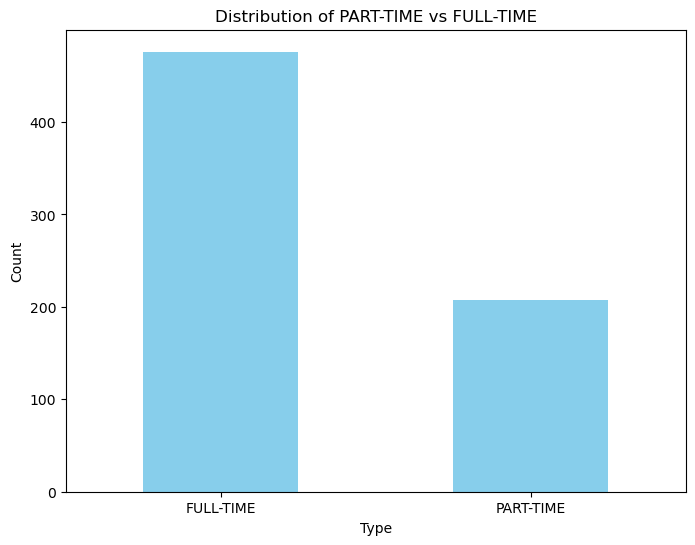

In [ ]:
value_counts = df['PART-TIME OR FULL-TIME'].value_counts()


plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of PART-TIME vs FULL-TIME')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:

df.dropna(inplace=True)
df.isna().sum()

File Name                 0
Job Title                 0
EXP Job Title             0
Job Number                0
Job Duties                0
Open Date                 0
EXPERIENCE_LENGTH         0
Education Years           0
PART-TIME OR FULL-TIME    0
School Type               0
Educational Major         0
Required License          0
Exam Type                 0
COURSE_SUBJECT            0
Course Counts             0
Course Length             0
Job Requirements          0
AVG Salary                0
dtype: int64

In [ ]:

df['File Name'] = df['File Name'].apply(lambda x: x.split('\\')[-1])


print(df['File Name'])


0                          311 DIRECTOR  9206 041814.txt
1                             ACCOUNTANT 1513 062218.txt
2                       ACCOUNTING CLERK 1223 071318.txt
3          ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt
4                 ADMINISTRATIVE ANALYST 1590 060118.txt
                             ...                        
678    WORKERS_ COMPENSATION CLAIMS ASSISTANT 1775 04...
679      X-RAY AND LABORATORY TECHNICIAN 2358 012916.txt
680                          ZOO CURATOR 4297 040816.txt
681             ZOO CURATOR OF EDUCATION 4300 091418.txt
682                        ZOO REGISTRAR 4290 070618.txt
Name: File Name, Length: 674, dtype: object


In [ ]:
df.to_csv('Cleaned_data.csv', index=False)

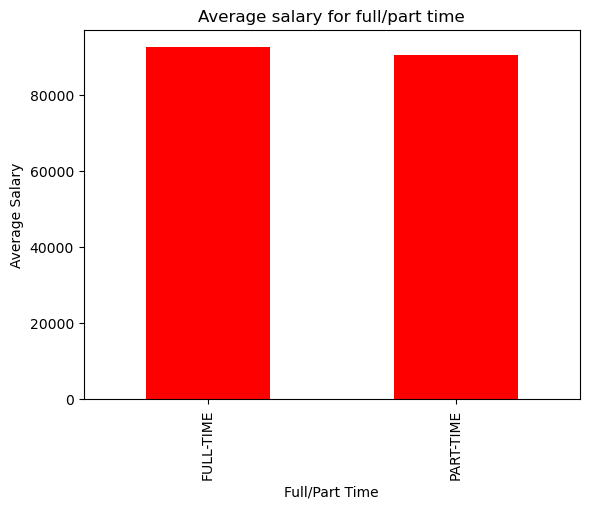

In [ ]:
a = df[['PART-TIME OR FULL-TIME','AVG Salary']]
a = a[a['PART-TIME OR FULL-TIME'] != '_']
c = ['red','green']
a.groupby('PART-TIME OR FULL-TIME').mean().plot(kind='bar', color=c)
plt.title('Average salary for full/part time')
plt.xlabel('Full/Part Time')
plt.ylabel('Average Salary')
plt.legend().remove()
plt.show()

In [ ]:
df.corr()

C:\Users\Pc\AppData\Local\Temp\ipykernel_24072\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Job Number,EXPERIENCE_LENGTH,Education Years,Course Counts,Course Length,AVG Salary
Job Number,1.000000,0.031994,0.062667,0.016352,0.028668,0.389378
EXPERIENCE_LENGTH,0.031994,1.000000,0.111573,-0.162973,-0.138277,0.245434
Education Years,0.062667,0.111573,1.000000,0.147997,0.162209,0.033899
Course Counts,0.016352,-0.162973,0.147997,1.000000,0.687958,-0.234249
Course Length,0.028668,-0.138277,0.162209,0.687958,1.000000,-0.173100
AVG Salary,0.389378,0.245434,0.033899,-0.234249,-0.173100,1.000000


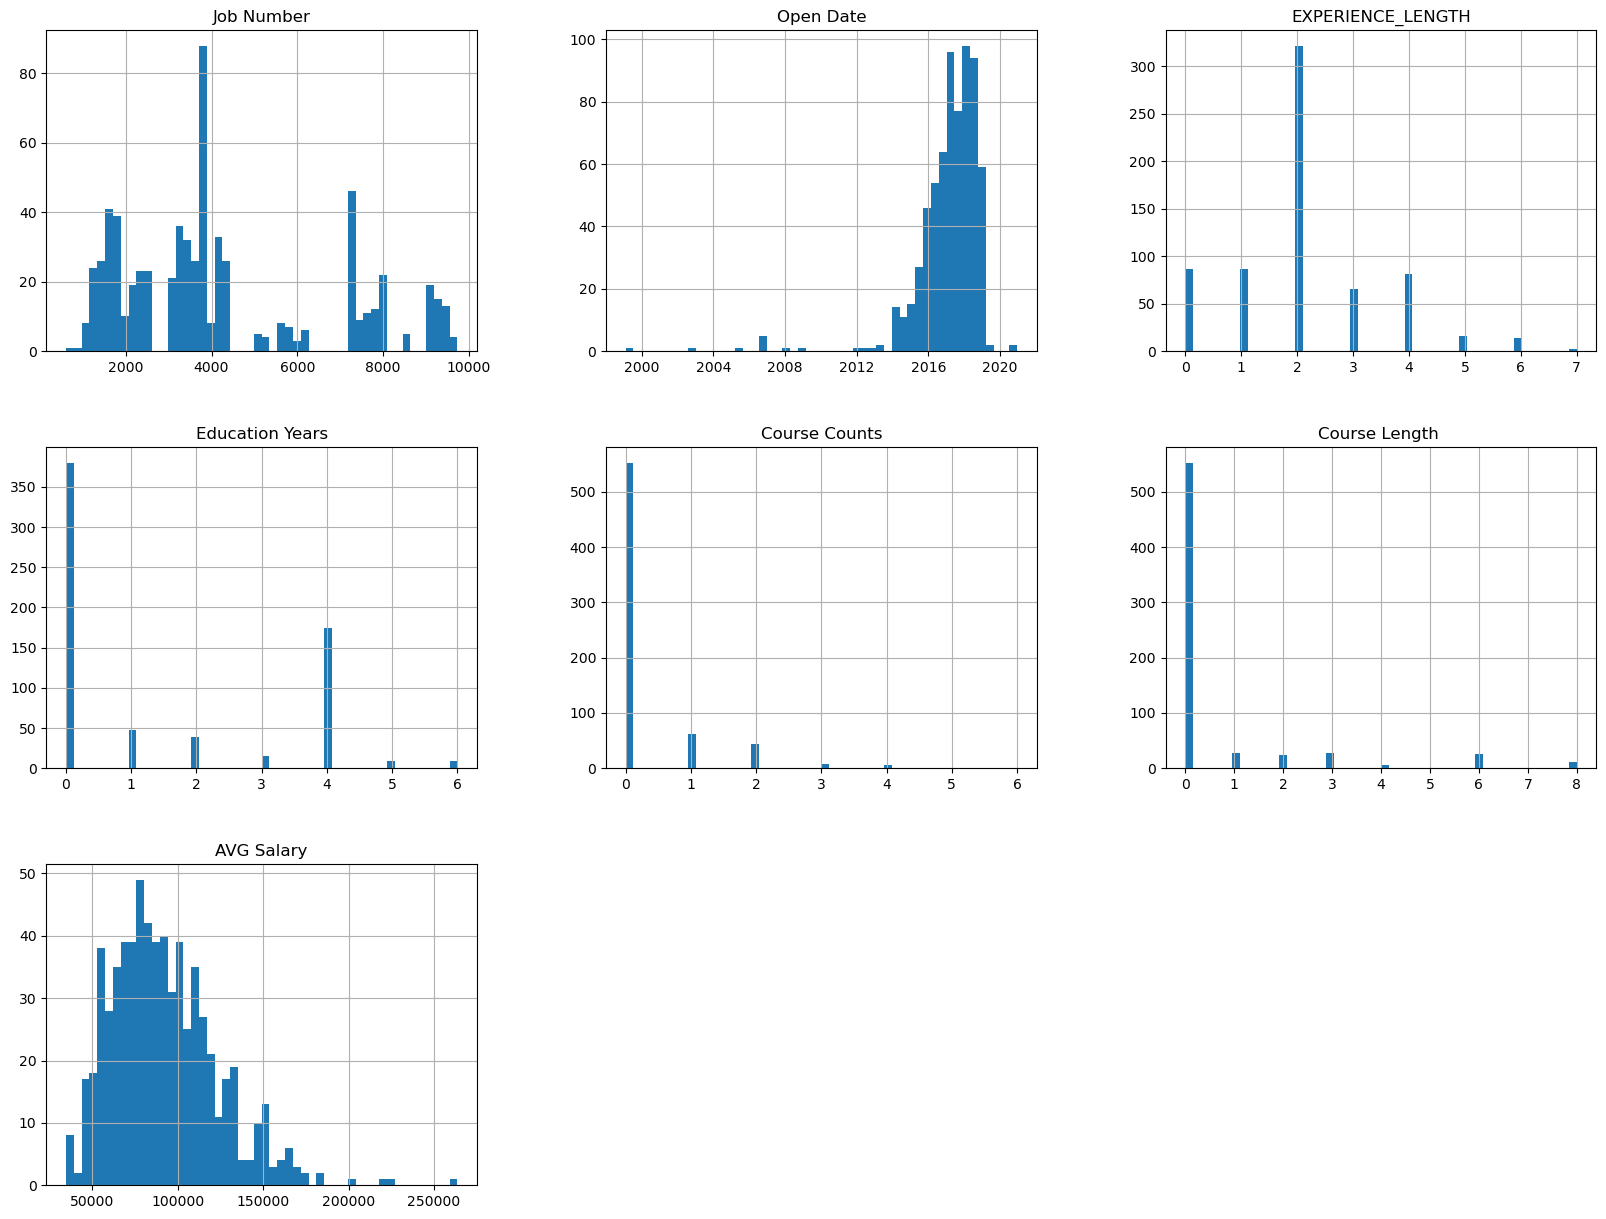

In [ ]:
df.hist(bins=50, figsize=(20,15));


### <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

In [ ]:
copy=df
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 682
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   File Name               674 non-null    object        
 1   Job Title               674 non-null    object        
 2   EXP Job Title           674 non-null    object        
 3   Job Number              674 non-null    float64       
 4   Job Duties              674 non-null    object        
 5   Open Date               674 non-null    datetime64[ns]
 6   EXPERIENCE_LENGTH       674 non-null    float64       
 7   Education Years         674 non-null    float64       
 8   PART-TIME OR FULL-TIME  674 non-null    object        
 9   School Type             674 non-null    object        
 10  Educational Major       674 non-null    object        
 11  Required License        674 non-null    object        
 12  Exam Type               674 non-null    object    

In [ ]:
# df=copy
# df.head()

### <span style="color:brown">Q1:

A non-experienced job seeker wants to know what is the best job for him?

In [ ]:
df['AVG Salary'].value_counts()

80241.5     6
151504.5    6
71607.5     4
89585.5     3
127712.5    3
           ..
77245.0     1
94523.0     1
90201.0     1
78675.0     1
68528.0     1
Name: AVG Salary, Length: 592, dtype: int64

In [ ]:
### Write you code here ###
len(df[df['EXPERIENCE_LENGTH'] == 0])

87

<Figure size 2000x1200 with 0 Axes>

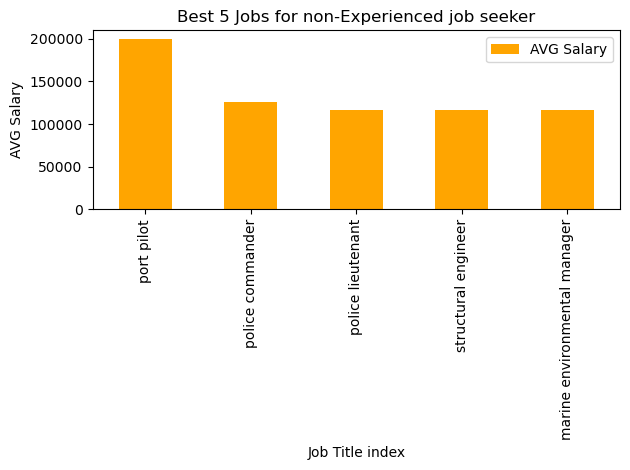

In [ ]:
plt.figure(figsize=(20, 12))

df[df['EXPERIENCE_LENGTH'] == 0][['Job Title','AVG Salary']].sort_values(['AVG Salary','Job Title'],ascending=False).head().plot.bar(color=['orange'])
plt.xlabel("Job Title index")
plt.ylabel("AVG Salary")
plt.title("Best 5 Jobs for non-Experienced job seeker")
p = ['port pilot','police commander','police lieutenant','structural engineer','marine environmental manager']
x = [0,1,2,3,4]
plt.xticks(x,p, rotation='vertical')
plt.tight_layout()
plt.show()


### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

In [ ]:
### Write you code here ###
df['School Type'].value_counts()

Not-Required             358
COLLEGE OR UNIVERSITY    190
APPRENTICESHIP            47
COLLEGE                   23
MASTER                    20
SCHOOL                    17
HIGH SCHOOL               17
UNIVERSITY                 2
Name: School Type, dtype: int64

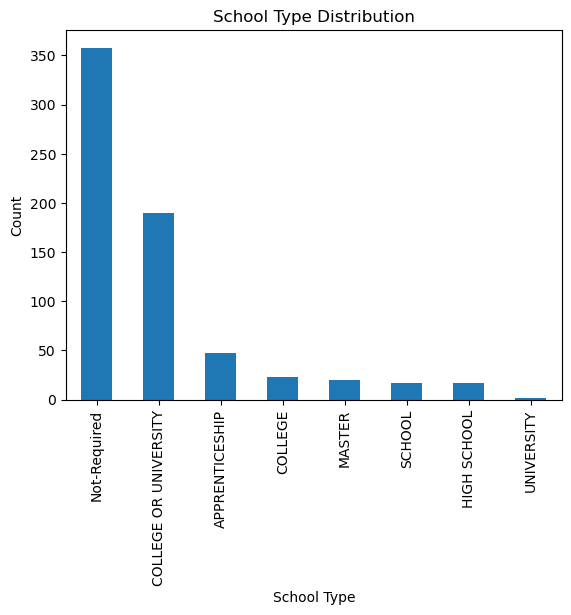

In [ ]:
df['School Type'].value_counts().plot.bar()
plt.title('School Type Distribution')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.show()


the most type mentioned is  None "No School Type" , so if the child is not interested in studing and want to just work so i recommend them to enroll with these jobs.we can say also  College or University as a best choice , then APPRENTICESHIP in the second , and high school as last choice

### <span style="color:brown">Q3:

What the best time in the year to be ready for a job applying in any experience level?

In [ ]:
df['Open Date']

0     2014-04-18
1     2018-06-22
2     2018-07-13
3     2018-07-27
4     2018-06-01
         ...    
678   2014-04-11
679   2016-01-29
680   2016-04-08
681   2018-09-14
682   2018-07-06
Name: Open Date, Length: 674, dtype: datetime64[ns]

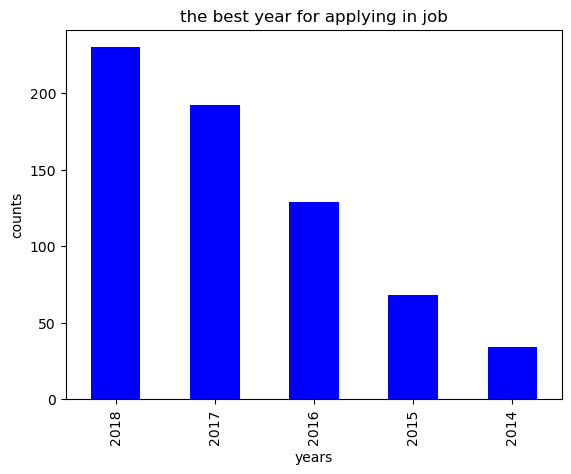

In [ ]:
### Write you code here ###
df['Open Date'] = pd.to_datetime(df['Open Date'])

year = df['Open Date'].dt.year
# as i mentioned befor that some job not have an open date so i say that is equal to zero
year = year.fillna(0)
year = year.astype(int)
year.value_counts().head().plot.bar(color='blue')
plt.title('the best year for applying in job')
plt.xlabel('years')
plt.ylabel('counts')
plt.show()

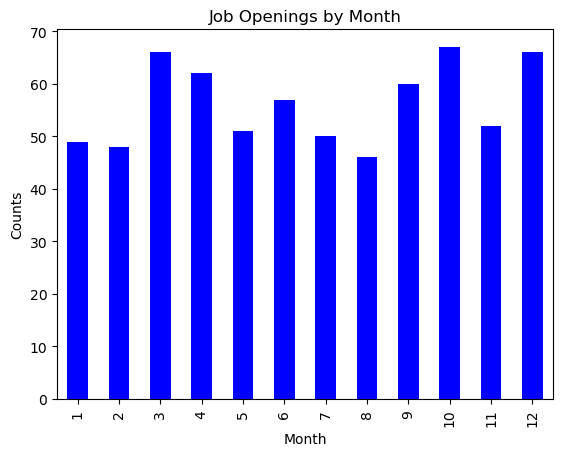

In [ ]:


# Assuming 'Open Date' is a column in your DataFrame df
df['Open Date'] = pd.to_datetime(df['Open Date'])

# Extract the month from the 'Open Date' column
month = df['Open Date'].dt.month

# Create a bar plot based on the counts of job openings for each month
month.value_counts().sort_index().plot.bar(color='blue')

plt.title('Job Openings by Month')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.show()


As the years progress, it's evident that there has been an increase in job opportunities and a rise in job applications.

### <span style="color:brown">Q4:

Is experience more important than educational level?

In [ ]:
df.head(2)

,File Name,Job Title,EXP Job Title,Job Number,Job Duties,Open Date,EXPERIENCE_LENGTH,Education Years,PART-TIME OR FULL-TIME,School Type,Educational Major,Required License,Exam Type,COURSE_SUBJECT,Course Counts,Course Length,Job Requirements,AVG Salary
0,311 DIRECTOR 9206 041814.txt,311 DIRECTOR,SENIOR MANAGEMENT ANALYST,9206.0,A 311 Director is responsible for the successf...,2014-04-18,1.0,1.0,PART-TIME,COLLEGE OR UNIVERSITY,SALES,P,BOTH AN INTERDEPARTMENTAL PROMOTIONAL AND OPEN...,Not-Required,0,0,1. One year of full-time paid experience as a ...,140344.5
1,ACCOUNTANT 1513 062218.txt,ACCOUNTANT,Not-Required,1513.0,An Accountant does professional accounting wor...,2018-06-22,0.0,4.0,FULL-TIME,COLLEGE OR UNIVERSITY,ACCOUNTING,R,ONLY ON AN OPEN COMPETITIVE BASIS,accounting.,2,1,Graduation from an accredited four-year colleg...,61449.5


In [ ]:
### Write you code here ###
# Counting the number of bulletins with no school type requirement
no_school = df[df["School Type"] == "Not-Required"]["School Type"].value_counts()

# Counting the number of bulletins with no experience job requirement
no_exp_job =df[df["EXP Job Title"] == "Not-Required"]["EXP Job Title"].value_counts()

# Counting the number of bulletins with no experience years requirement
no_exp_years = df[df["EXPERIENCE_LENGTH"] == 0]["EXPERIENCE_LENGTH"].value_counts()

print("Number of bulletins with no specified school type requirement: ")
print(no_school)

print("\nNumber of bulletins with no specified experience job requirement: ")
print(no_exp_job)

print("\nNumber of bulletins with no specified experience years requirement: ")
print(no_exp_years)


Number of bulletins with no specified school type requirement: 
Not-Required    358
Name: School Type, dtype: int64

Number of bulletins with no specified experience job requirement: 
Not-Required    38
Name: EXP Job Title, dtype: int64

Number of bulletins with no specified experience years requirement: 
0.0    87
Name: EXPERIENCE_LENGTH, dtype: int64


"Out of the total bulletins analyzed, we found that  358 bulletins did not specify any school type requirement, 38 bulletins lacked an explicit experience job requirement, and 87 bulletins did not mention experience years. Consequently, these findings suggest that experience might hold more significance than educational level when considering job requirements."

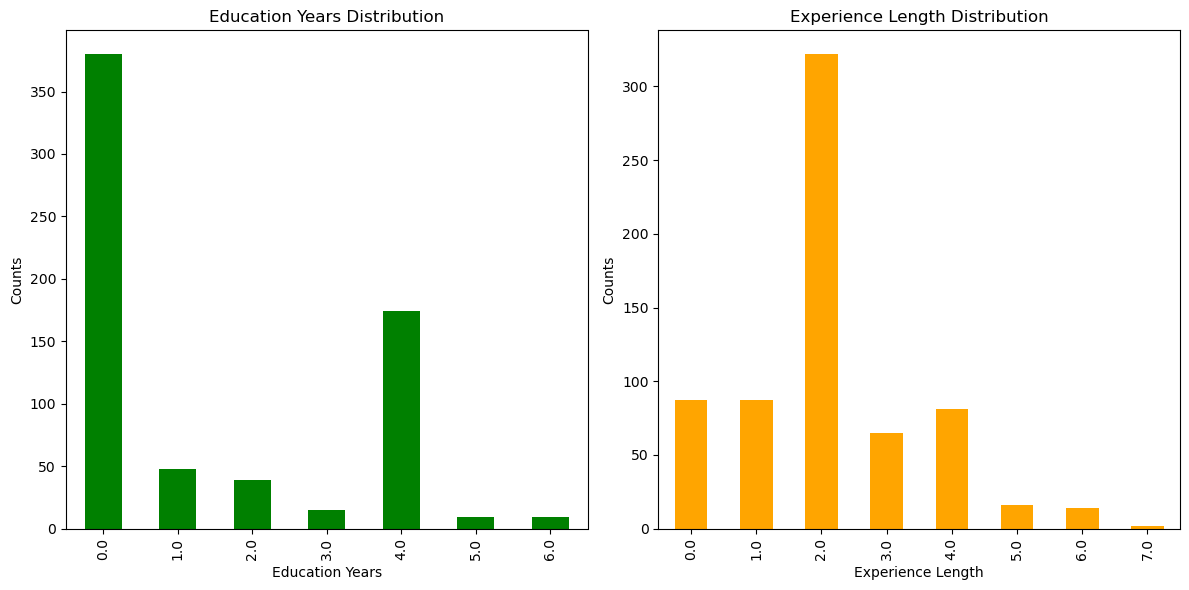

In [ ]:

# Assuming 'education years' and 'experience length' are columns in your DataFrame df


# Convert columns to numeric (assuming they contain numerical values)
df['EXPERIENCE_LENGTH'] = pd.to_numeric(df['EXPERIENCE_LENGTH'], errors='coerce')
df['Education Years'] = pd.to_numeric(df['Education Years'], errors='coerce')

# Create bar plots for 'Education Years' and 'EXPERIENCE_LENGTH'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['Education Years'].dropna().value_counts().sort_index().plot.bar(color='green')
plt.title('Education Years Distribution')
plt.xlabel('Education Years')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
df['EXPERIENCE_LENGTH'].dropna().value_counts().sort_index().plot.bar(color='orange')
plt.title('Experience Length Distribution')
plt.xlabel('Experience Length')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()


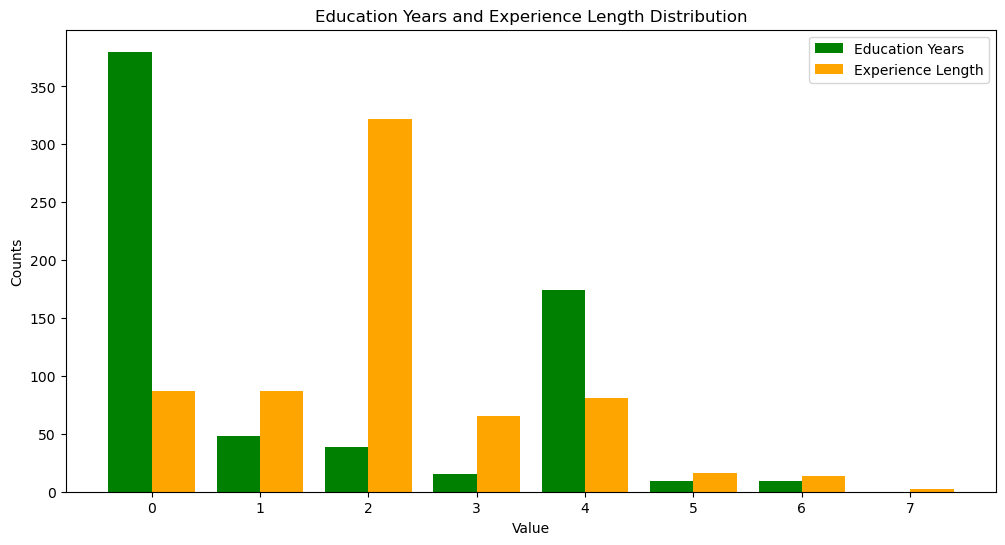

In [ ]:
# Assuming 'education years' and 'experience length' are columns in your DataFrame df

# Convert columns to numeric (assuming they contain numerical values)
df['EXPERIENCE_LENGTH'] = pd.to_numeric(df['EXPERIENCE_LENGTH'], errors='coerce')
df['Education Years'] = pd.to_numeric(df['Education Years'], errors='coerce')

# Create a single bar plot for 'Education Years' and 'EXPERIENCE_LENGTH'
plt.figure(figsize=(12, 6))

plt.bar(df['Education Years'].dropna().value_counts().sort_index().index - 0.2,
        df['Education Years'].dropna().value_counts().sort_index().values,
        width=0.4, color='green', label='Education Years')

plt.bar(df['EXPERIENCE_LENGTH'].dropna().value_counts().sort_index().index + 0.2,
        df['EXPERIENCE_LENGTH'].dropna().value_counts().sort_index().values,
        width=0.4, color='orange', label='Experience Length')

plt.title('Education Years and Experience Length Distribution')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.legend()
plt.show()

Based on the chart and analysis showing the distribution of experience length versus education years for the advertised jobs, it appears that experience is more crucial than education in most of the advertised positions.

Observing the chart illustrating the distribution of experience length and education years, if the advertised jobs require a greater length of experience compared to the required years of education, it suggests that experience is the primary or more critical factor in these roles.

### <span style="color:brown">Q5:

Which fresh grade job that will guarantee many job offers in the future for him?

WATER UTILITY SUPERINTENDENT          2
SENIOR UTILITY SERVICES SPECIALIST    2
CHIEF CLERK POLICE                    2
WATER TREATMENT OPERATOR              2
WASTEWATER TREATMENT OPERATOR         2
                                     ..
EQUIPMENT REPAIR SUPERVISOR           1
EQUIPMENT SPECIALIST                  1
EQUIPMENT SUPERINTENDENT              1
EQUIPMENT SUPERVISOR                  1
ZOO REGISTRAR                         1
Name: Job Title, Length: 669, dtype: int64


<Axes: title={'center': 'Top 4 EXP JOBS REQUIRED'}>

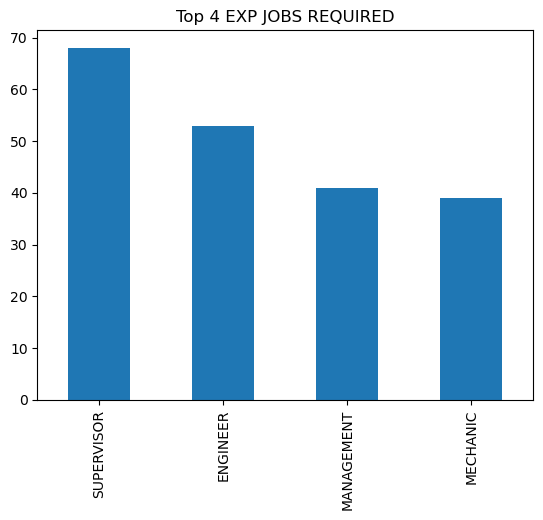

In [ ]:
### Write you code here ###
print(df["Job Title"].value_counts())
df["EXP Job Title"].value_counts().head(4).plot(kind='bar',title='Top 4 EXP JOBS REQUIRED')

#SUPERVISOR is the most guarantee job that help to get many job opportunities in the future.

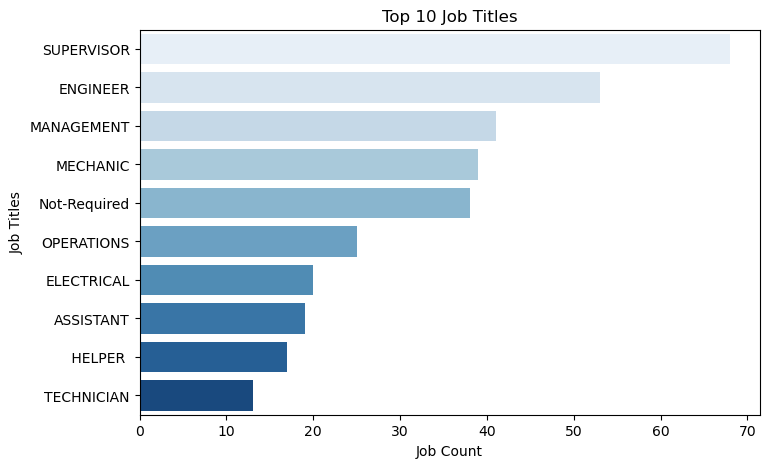

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Job Title' is the column containing job titles in your DataFrame df

plt.figure(figsize=(8, 5))

# Counting the occurrences of each job title
aa = Counter(df["EXP Job Title"])
q = aa.most_common(10)
job_titles, counts = zip(*q)

# Creating the bar plot
sns.barplot(x=list(counts), y=list(job_titles), palette='Blues')

plt.title('Top 10 Job Titles')
plt.xlabel('Job Count')
plt.ylabel('Job Titles')
plt.show()


#
Supervisor stands out as the job role that offers the most promising prospects for securing numerous job opportunities in the future

### <span style="color:brown">Q6:

"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER
"

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments you structred above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?

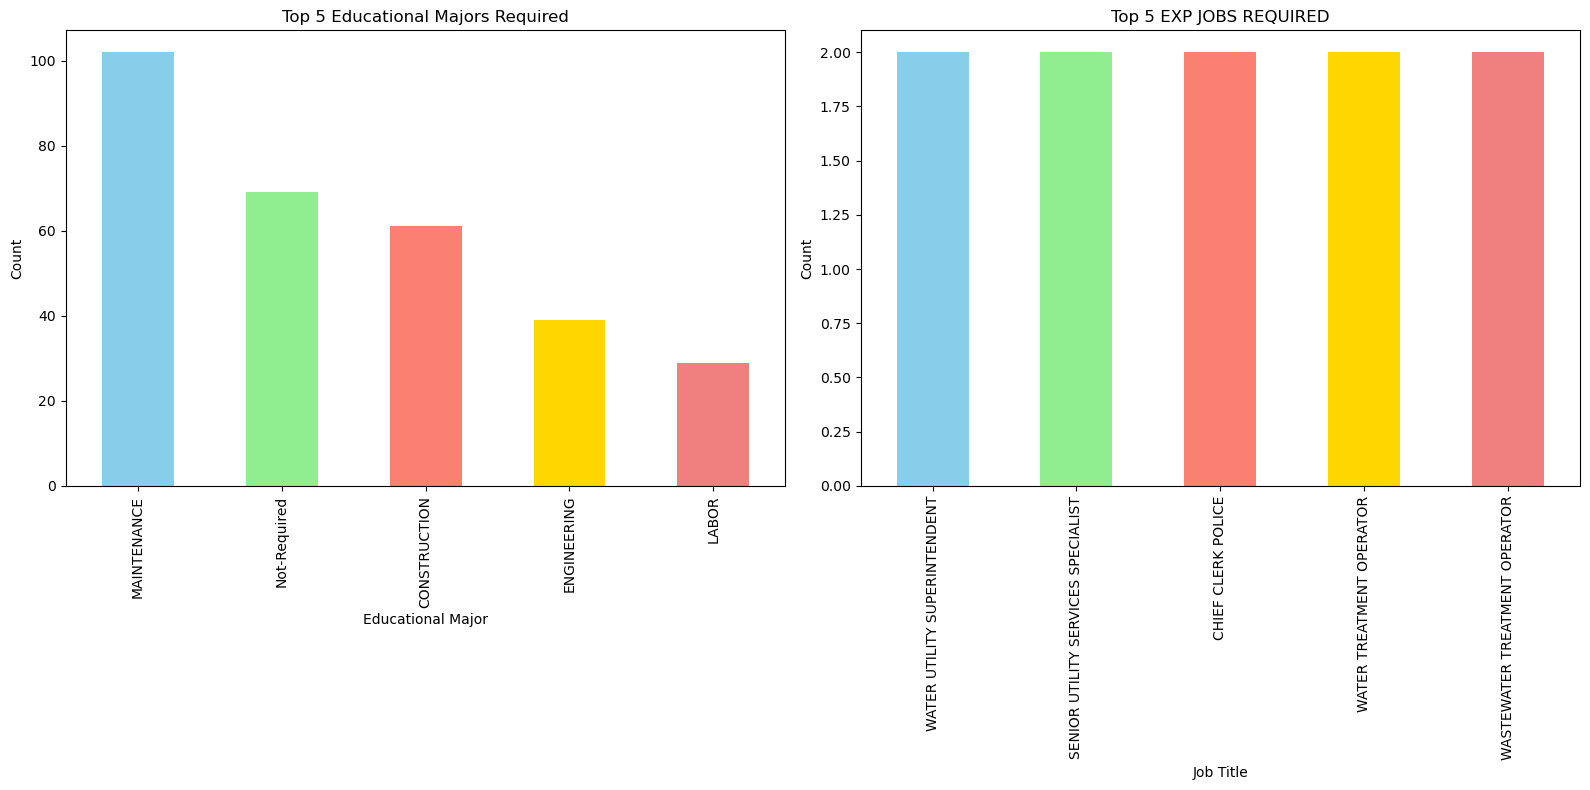

In [ ]:
### Write you code here ###

plt.figure(figsize=(16,8))

colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']

plt.subplot(1,2,1)
df["Educational Major"].value_counts().head(5).plot(kind='bar', title="Top 5 Educational Majors Required", color=colors)
plt.xlabel("Educational Major")
plt.ylabel("Count")

plt.subplot(1,2,2)
df["Job Title"].value_counts().head(5).plot(kind='bar', title='Top 5 EXP JOBS REQUIRED', color=colors)
plt.xlabel("Job Title")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


### <span style="color:brown">Q7:

The city need an advice based on your analysis, build a new schools for more fresh non-experienced workers or encorge the work environment to help the workers to get promotions?

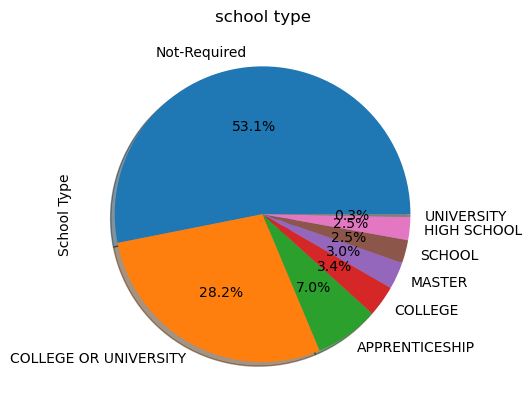

In [ ]:
### Write you code here ###
df['School Type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('school type')
plt.show()

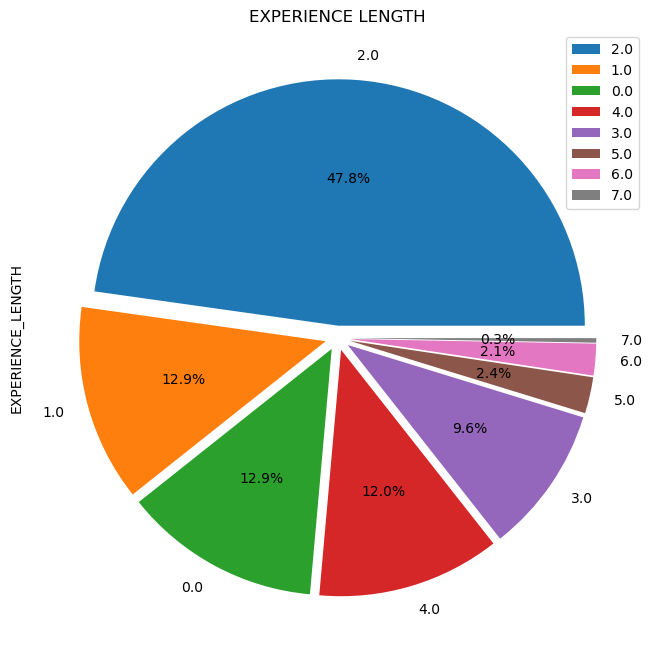

In [ ]:
plt.figure(figsize=(11,8))
df['EXPERIENCE_LENGTH'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05))
plt.title('EXPERIENCE LENGTH')
plt.legend()
plt.show()

 the answer of that question is as we see here that the most experience mentioned on the job requirment is 2 years

### <span style="color:brown">Q8:

What is the average salary for worker with a driver licence?

In [ ]:
### Write you code here ###
a = df[['AVG Salary', 'Required License']]
x = a[a['Required License'] == 'R']['AVG Salary'].mean()

b = df[['AVG Salary', 'Required License']]
z = b[b['Required License'] == 'p']['AVG Salary'].mean()

w = (x + z) / 2

Text(0, 0.5, 'Avg salary')

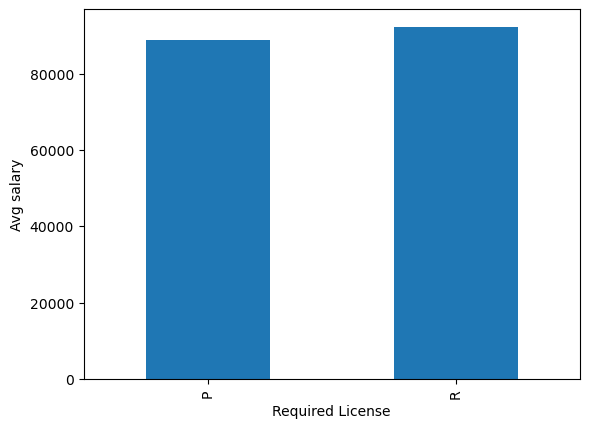

In [ ]:
a = df[['AVG Salary','Required License']]
a = a[a['Required License'] != 'N']
a.groupby(['Required License'])['AVG Salary'].mean().plot.bar()
plt.ylabel('Avg salary')

 In the plot, it's evident that individuals required to have a professional license receive a higher average salary compared to those who might possess a professional license.

## <span style="color:brown">Q9:

list the most feature that effect the salary of the worker.

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\Pc\AppData\Local\Temp\ipykernel_24072\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Job Number,EXPERIENCE_LENGTH,Education Years,Course Counts,Course Length,AVG Salary
Job Number,1.000000,0.031994,0.062667,0.016352,0.028668,0.389378
EXPERIENCE_LENGTH,0.031994,1.000000,0.111573,-0.162973,-0.138277,0.245434
Education Years,0.062667,0.111573,1.000000,0.147997,0.162209,0.033899
Course Counts,0.016352,-0.162973,0.147997,1.000000,0.687958,-0.234249
Course Length,0.028668,-0.138277,0.162209,0.687958,1.000000,-0.173100
AVG Salary,0.389378,0.245434,0.033899,-0.234249,-0.173100,1.000000


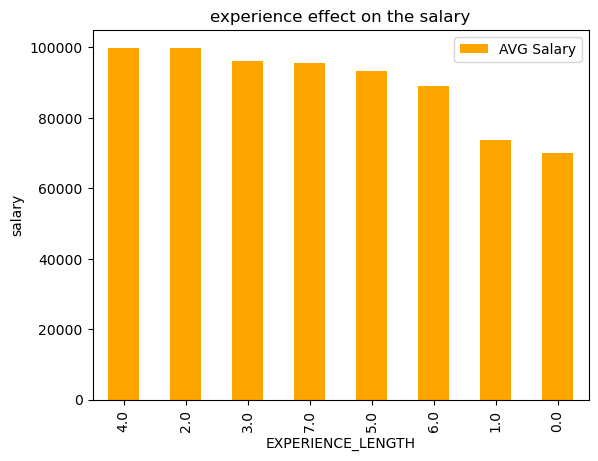

In [ ]:
### Write you code here ###

df1 = df[['AVG Salary','EXPERIENCE_LENGTH']]
df1.groupby(['EXPERIENCE_LENGTH']).mean().sort_values(by="AVG Salary",ascending=False).plot.bar(color='orange')
plt.title('experience effect on the salary')
plt.ylabel('salary')
plt.legend()
plt.show()


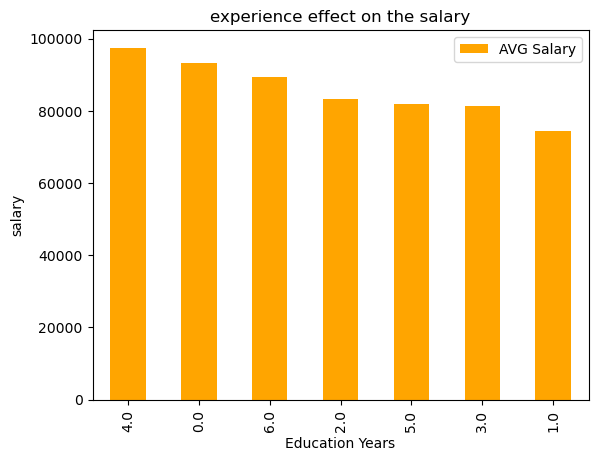

In [ ]:
### Write you code here ###

df1 = df[['AVG Salary','Education Years']]
df1.groupby(['Education Years']).mean().sort_values(by="AVG Salary",ascending=False).plot.bar(color='orange')
plt.title('experience effect on the salary')
plt.ylabel('salary')
plt.legend()
plt.show()


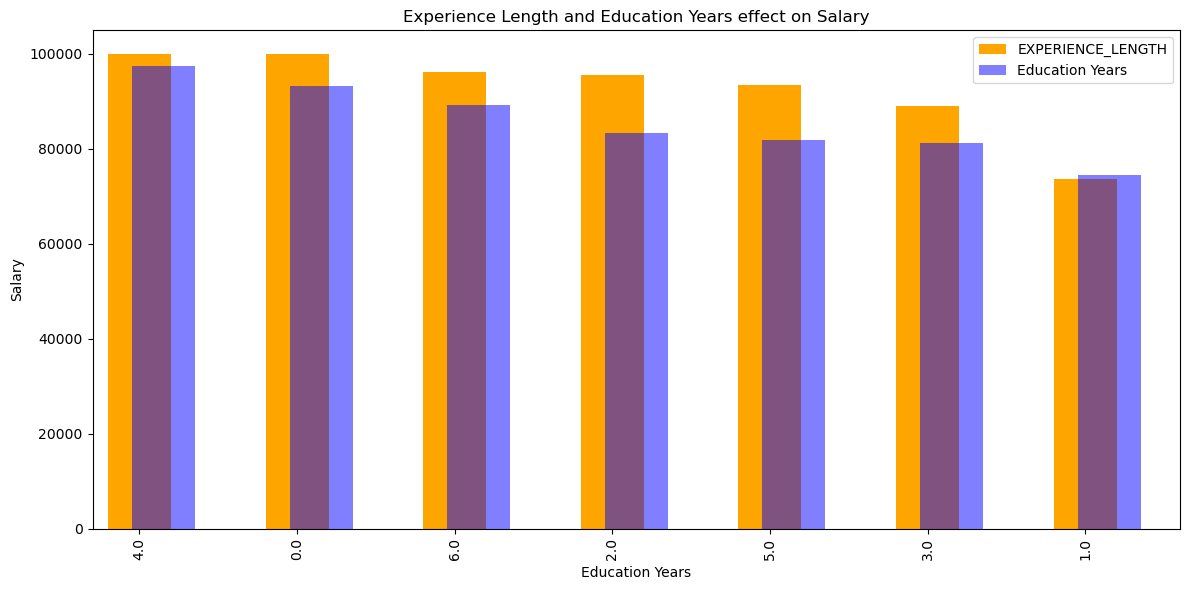

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for two bar plots with increased displacement
fig, axes = plt.subplots(figsize=(12, 6))

# Bar plot for 'EXPERIENCE_LENGTH' and 'AVG Salary'
df1 = df[['AVG Salary', 'EXPERIENCE_LENGTH']]
df1.groupby('EXPERIENCE_LENGTH').mean().sort_values(by='AVG Salary', ascending=False).plot.bar(
    color='orange', ax=axes, width=0.4
)
axes.set_title('Experience Length and Education Years effect on Salary')
axes.set_ylabel('Salary')
axes.set_xlabel('Experience Length')

# Bar plot for 'Education Years' and 'AVG Salary' with increased displacement
df2 = df[['AVG Salary', 'Education Years']]
df2.groupby('Education Years').mean().sort_values(by='AVG Salary', ascending=False).plot.bar(
    color='blue', ax=axes, alpha=0.5, width=0.4, position=0.12
)

plt.legend(['EXPERIENCE_LENGTH', 'Education Years'])  # Add legend for both plots
plt.tight_layout()
plt.show()

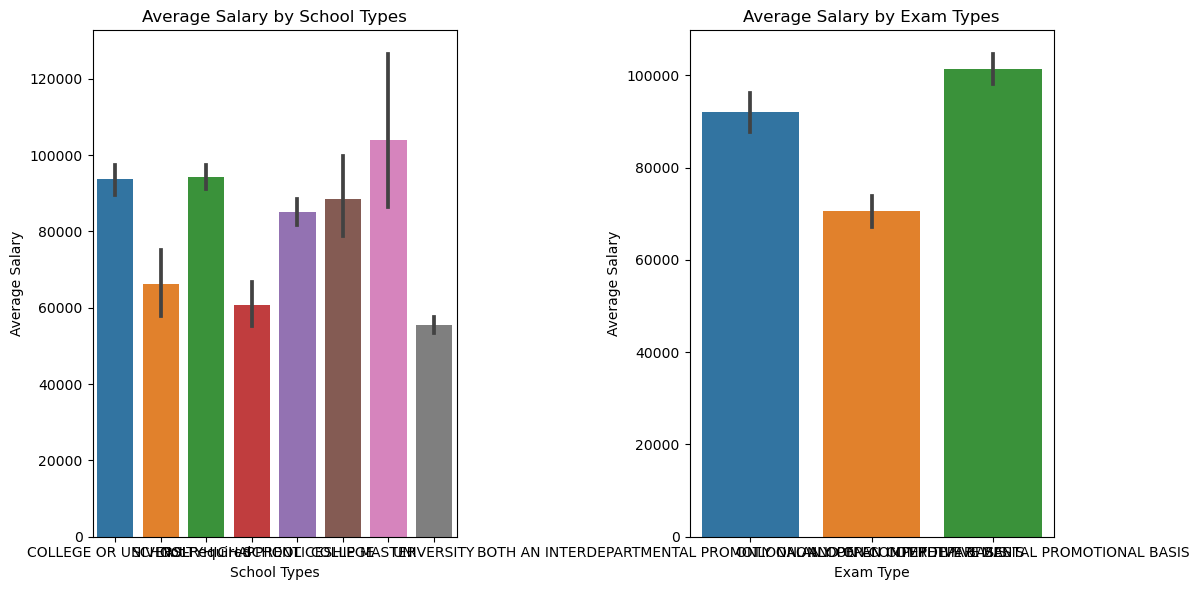

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for 'School Types' and 'AVG Salary'
sns.barplot(x='School Type', y='AVG Salary', data=df, ax=axes[0])
axes[0].set_title('Average Salary by School Types')
axes[0].set_xlabel('School Types')
axes[0].set_ylabel('Average Salary')

# Bar plot for 'Exam Type' and 'AVG Salary'
sns.barplot(x='Exam Type', y='AVG Salary', data=df, ax=axes[1])
axes[1].set_title('Average Salary by Exam Types')
axes[1].set_xlabel('Exam Type')
axes[1].set_ylabel('Average Salary')

plt.tight_layout()
plt.show()


## <span style="color:brown">Q10:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

In [ ]:
### Write you code here ###
#note: use_univariate with continouius
data.describe()

In [ ]:
sns.countplot(data=df,x='EXPERIENCE_LENGTH',color = 'blue')
plt.title('Experience level')
plt.show()

In [ ]:
# Calculate explode values for pie chart
data["Education Years"].value_counts().plot(kind='bar',title='Experience Years Required')

In [ ]:
data["Course Counts"].value_counts().plot(kind='bar',title='Course Counts Required')

In [ ]:
data.columns

In [ ]:
data[ 'Course Length '].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Course Length in Months Required')
plt.xlabel('Course Length (Months)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()


In [ ]:


# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='AVG Salary', color='blue')
plt.title('Boxplot of Average Salary Distribution')
plt.ylabel('Average Salary')
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, y='AVG Salary', color='orange')
plt.title('Violin Plot of Average Salary Distribution')
plt.ylabel('Average Salary')
plt.show()


In [ ]:
sns.distplot(data["AVG Salary"],kde=True,color="r")
plt.title("Average Salary")
plt.show()

In summary of these statistics, we observe that the majority of job bulletins do not prioritize requiring courses as a primary criterion. Experience years are highly sought after. The number of education years is not a predominant requirement in most bulletins; however, in cases where it is required, four years is commonly specified. The average salary values exhibit a normal distribution pattern with no evident skewness, which is favorable.

## <span style="color:brown">Q11:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


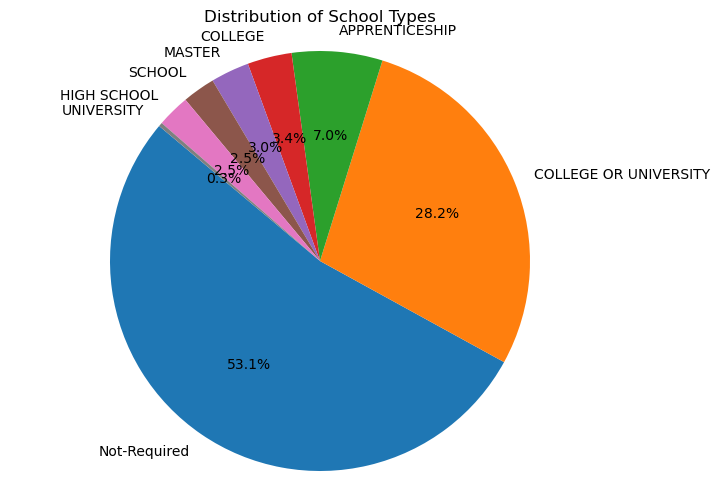

In [ ]:
### Write you code here ###
#note: use_univariate with catergircal

#using pie chart
# Calculate value counts for 'School Type'
school_type_counts = df['School Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(school_type_counts, labels=school_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of School Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


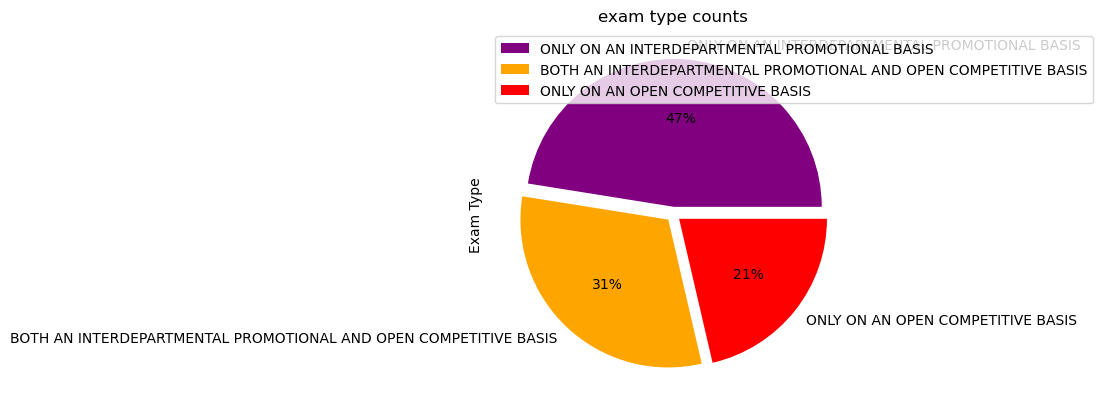

In [ ]:
df['Exam Type'].value_counts().plot.pie(autopct='%1.0f%%',explode=(0.05,0.05,0.05),colors=['purple','orange','red'])
plt.title('exam type counts')
plt.legend(loc='upper left')


<Axes: title={'center': 'Required License Jobs Percentage'}>

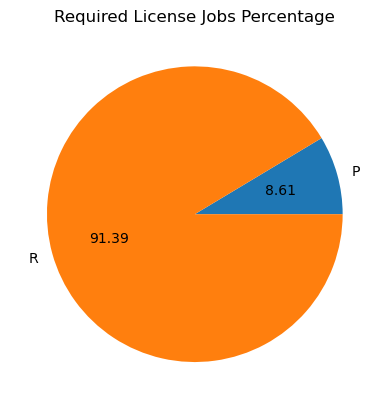

In [ ]:
df.groupby('Required License').size().plot(kind='pie', autopct='%.2f',ylabel="",title="Required License Jobs Percentage")

<Axes: title={'center': 'Full_part time'}>

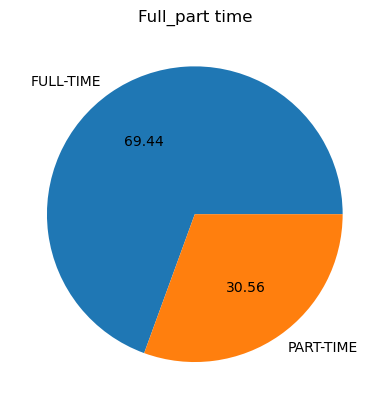

In [ ]:
df.groupby('PART-TIME OR FULL-TIME').size().plot(kind='pie', autopct='%.2f',ylabel="",title="Full_part time")

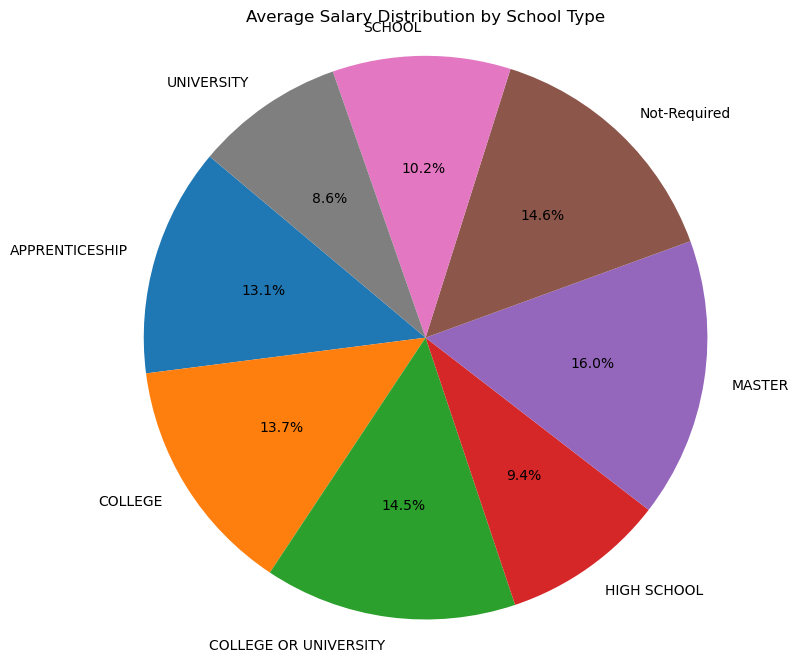

In [ ]:
# Calculate the average salary for each school type
avg_salary_school_type = df.groupby('School Type')['AVG Salary'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_salary_school_type, labels=avg_salary_school_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Salary Distribution by School Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()




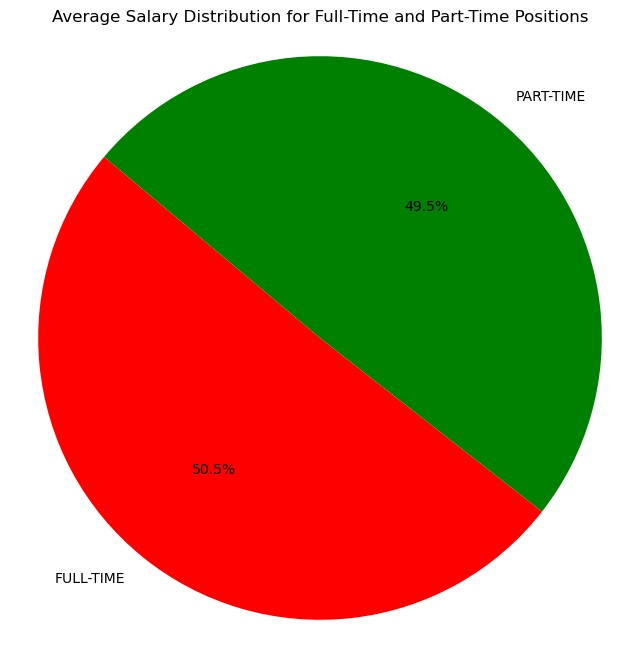

In [ ]:
# Filter the dataframe to remove entries with '_' in 'PART-TIME OR FULL-TIME'
filtered_df = df[df['PART-TIME OR FULL-TIME'] != '_']

# Calculate the average salary for full-time and part-time positions
avg_salary_by_type = filtered_df.groupby('PART-TIME OR FULL-TIME')['AVG Salary'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_salary_by_type, labels=avg_salary_by_type.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=140)
plt.title('Average Salary Distribution for Full-Time and Part-Time Positions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



## Great Job.